

# Dataset 1


**Data Preprocessing:**

Outlier removal using IQR.

Correlation matrix analysis and removal of highly correlated features.


**Dataset Splitting**:


Stratified train, validation, and test splits to preserve class balance.


**Exploratory Analysis:**

Summary statistics, boxplots, and class distribution plots.


**Model Training and Hyperparameter Tuning:**

Random Forest classifier with GridSearchCV to optimize hyperparameters.

**Cross-Validation:**

Stratified K-Fold Cross-Validation to ensure model robustness.

**Model Evaluation:**

Metrics like accuracy, precision, recall, F1-score across folds.
Confusion matrix visualization for detailed error analysis.

**Feature Importance Analysis:**

Bar plot of feature importances from the Random Forest model.

**PR Curve:**

Precision-Recall Curve to evaluate model performance, especially for imbalanced datasets.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/drive/MyDrive/ml/Data_66_featurs.csv'
dataset = pd.read_csv(file_path)

# Display dataset structure
print("Dataset Columns:", dataset.columns)
print(dataset.info())

# Step 1: Separating features and target
X = dataset.drop(columns=["Label"])
y = dataset["Label"]

# Step 2: Splitting dataset into train, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 3: Handling imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fitting the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# Step 6: Feature Importance Visualization
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 8))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.show()

# Step 7: Validation Metrics
y_val_pred = best_model.predict(X_val_scaled)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion Matrix for Validation
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=val_conf_matrix, display_labels=best_model.classes_)
disp_val.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# Step 8: Test Metrics
y_test_pred = best_model.predict(X_test_scaled)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for Test
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=best_model.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Step 9: Overall Metrics (Accuracy, Precision, Recall, F1-Score)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


Dataset Columns: Index(['url_length', 'url_special_characters', 'url_tag_script',
       'url_tag_iframe', 'url_attr_src', 'url_event_onload',
       'url_event_onmouseover', 'url_cookie', 'url_number_keywords_param',
       'url_number_domain', 'html_tag_script', 'html_tag_iframe',
       'html_tag_meta', 'html_tag_object', 'html_tag_embed', 'html_tag_link',
       'html_tag_svg', 'html_tag_frame', 'html_tag_form', 'html_tag_div',
       'html_tag_style', 'html_tag_img', 'html_tag_input', 'html_tag_textarea',
       'html_attr_action', 'html_attr_background', 'html_attr_classid',
       'html_attr_codebase', 'html_attr_href', 'html_attr_longdesc',
       'html_attr_profile', 'html_attr_src', 'html_attr_usemap',
       'html_attr_http-equiv', 'html_event_onblur', 'html_event_onchange',
       'html_event_onclick', 'html_event_onerror', 'html_event_onfocus',
       'html_event_onkeydown', 'html_event_onkeypress', 'html_event_onkeyup',
       'html_event_onload', 'html_event_onmousedown'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


KeyboardInterrupt: 

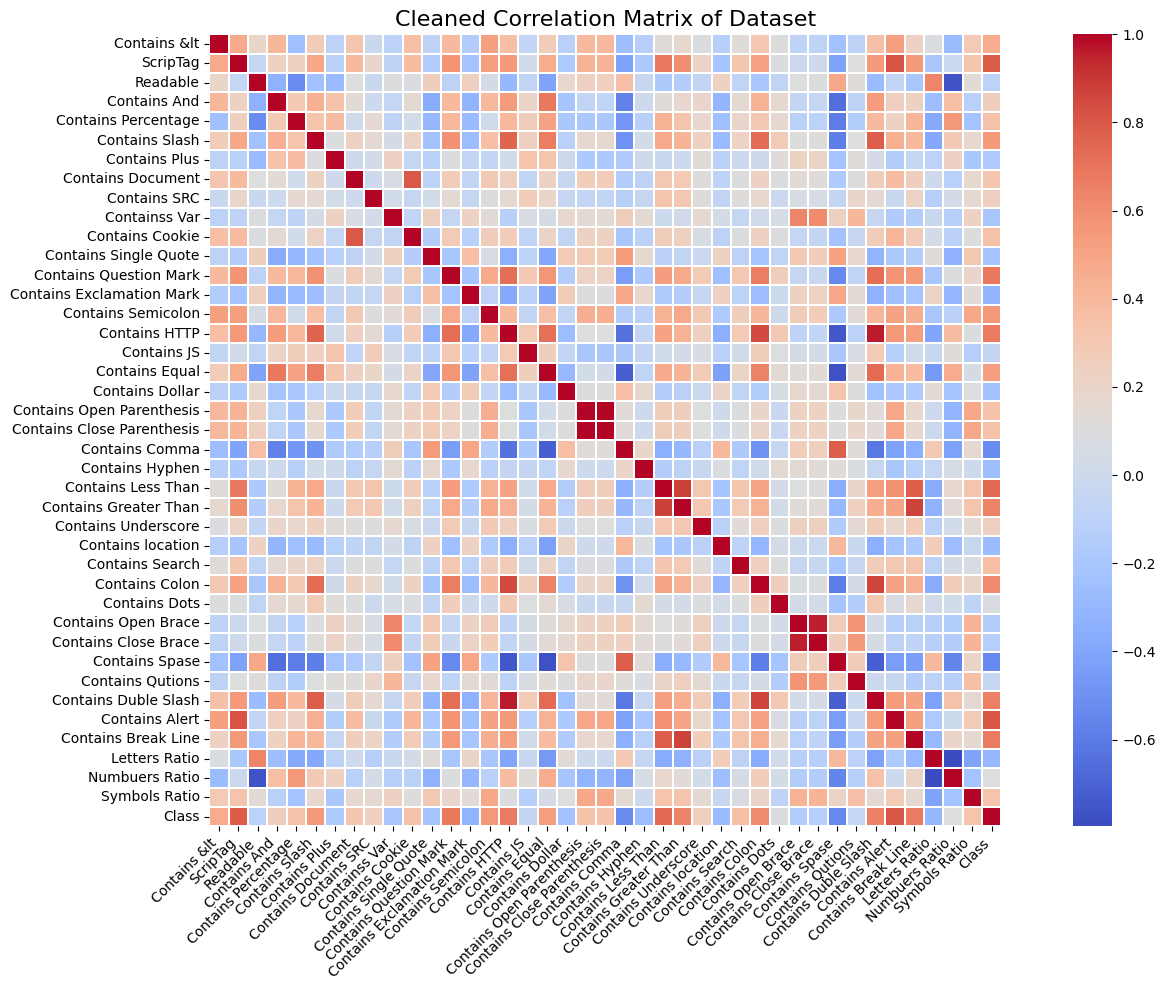

In [ ]:
# Step 0: Correlation Matrix Visualization (Cleaned Up)
correlation_matrix = dataset.corr()

# Plot the cleaned correlation matrix
plt.figure(figsize=(15, 10))  # Increase figure size for better readability
sns.heatmap(
    correlation_matrix,
    annot=False,  # Disable annotations for cleaner visualization
    fmt=".2f",  # Format values to 2 decimal places
    cmap='coolwarm',
    linewidths=0.1,  # Reduce line width
    square=True  # Make cells square-shaped for consistency
)
plt.title("Cleaned Correlation Matrix of Dataset", fontsize=16)  # Larger title font
plt.xticks(fontsize=10, rotation=45, ha='right')  # Adjust x-axis labels
plt.yticks(fontsize=10)  # Adjust y-axis labels
plt.tight_layout()  # Automatically adjust layout
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/ml/Data_66_featurs.csv'
dataset = pd.read_csv(file_path)

# Horizontal summary as a single row
summary_row = dataset.describe().T.reset_index()
summary_row.columns = ['Feature', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
print(summary_row)


                   Feature     Count          Mean            Std   Min  \
0               url_length  138567.0     66.846796      64.860126  11.0   
1   url_special_characters  138567.0      0.257709       0.437375   0.0   
2           url_tag_script  138567.0      0.228922       0.420140   0.0   
3           url_tag_iframe  138567.0      0.010825       0.103479   0.0   
4             url_attr_src  138567.0      0.032439       0.177164   0.0   
..                     ...       ...           ...            ...   ...   
63  js_min_define_function  138567.0      0.041316       0.923977   0.0   
64   js_min_function_calls  138567.0      1.495472      32.885729   0.0   
65    js_string_max_length  138567.0   7495.091941   49304.723862   0.0   
66             html_length  138567.0  81254.108475  150334.155732   0.0   
67                   Label  138567.0      0.278335       0.448181   0.0   

        25%      50%      75%         Max  
0      30.0     48.0     86.0      3158.0  
1       0.0

In [ ]:
# Check for class distribution in the dataset
class_distribution = dataset['label'].value_counts(normalize=True) * 100

# Display class distribution
class_distribution


KeyError: 'label'

Outlier detetction

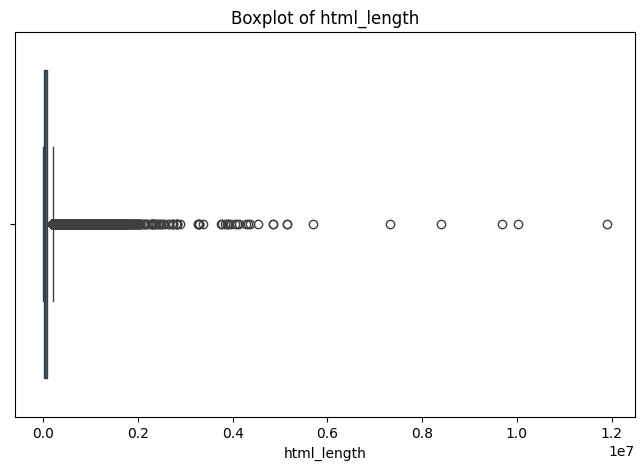

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset['html_length'])
plt.title("Boxplot of html_length")
plt.show()


Observation: Features like html_length and js_string_max_length have extreme outliers.


Solution: Used IQR

In [ ]:
Q1 = scaled_dataset.quantile(0.25)
Q3 = scaled_dataset.quantile(0.75)
IQR = Q3 - Q1

# Filter data by removing outliers
filtered_dataset = scaled_dataset[~((scaled_dataset < (Q1 - 1.5 * IQR)) | (scaled_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Original dataset shape: {scaled_dataset.shape}")
print(f"Filtered dataset shape: {filtered_dataset.shape}")



Original dataset shape: (138567, 68)
Filtered dataset shape: (11112, 68)


Feature Selection:



Removed highly correlated features to reduce redundancy.

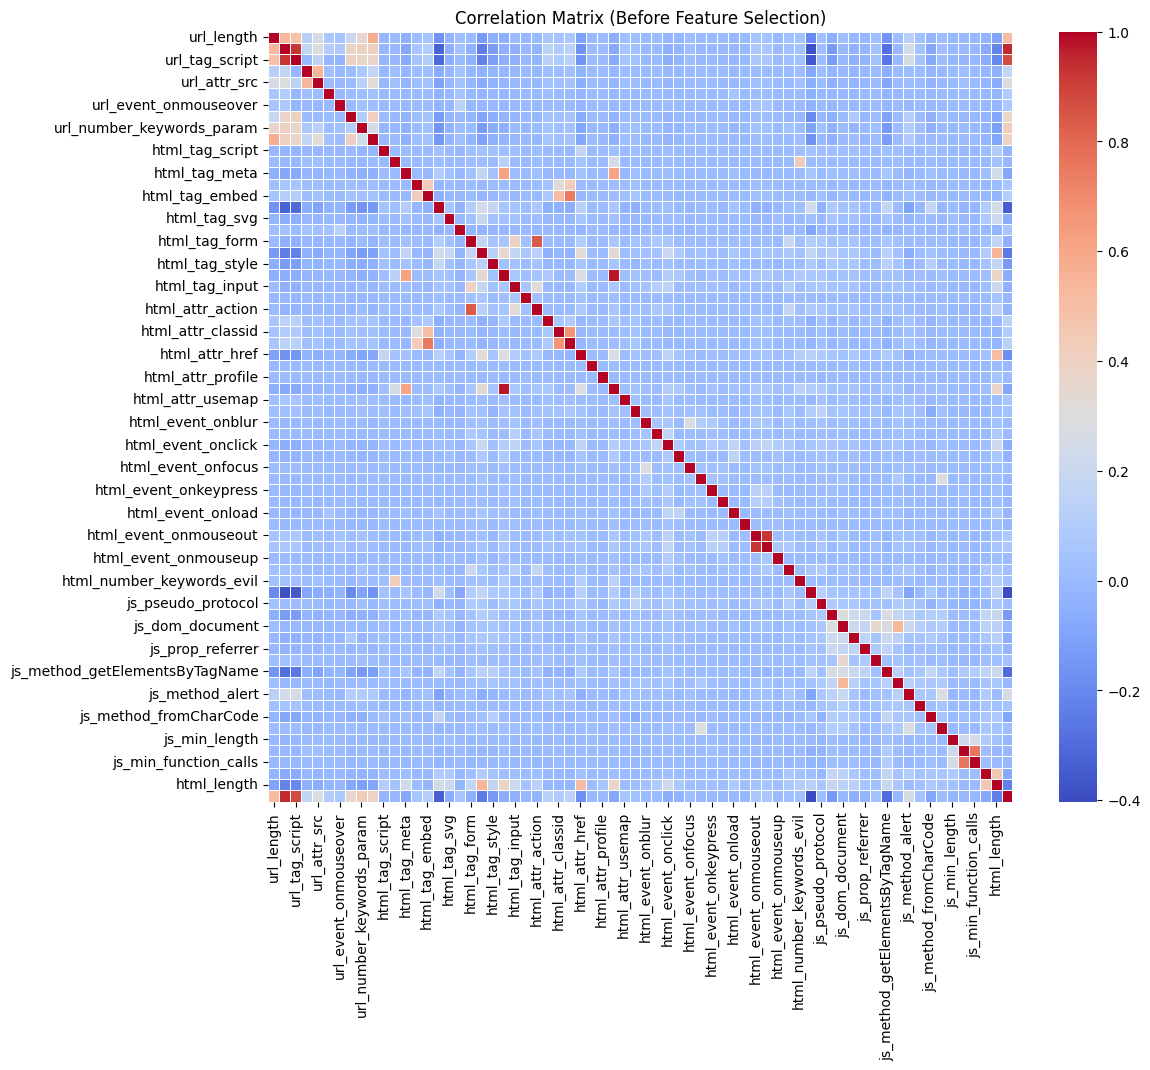

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Before Feature Selection)")
plt.show()


In [ ]:
import numpy as np

# Upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)) # Convert to boolean array

# Find features with correlation greater than 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
reduced_dataset = dataset.drop(columns=to_drop)

print(f"Removed Features: {to_drop}")
print(f"Shape before: {dataset.shape}, Shape after: {reduced_dataset.shape}")


Removed Features: ['url_tag_script', 'html_attr_src', 'html_event_onmouseover', 'Label']
Shape before: (138567, 68), Shape after: (138567, 64)


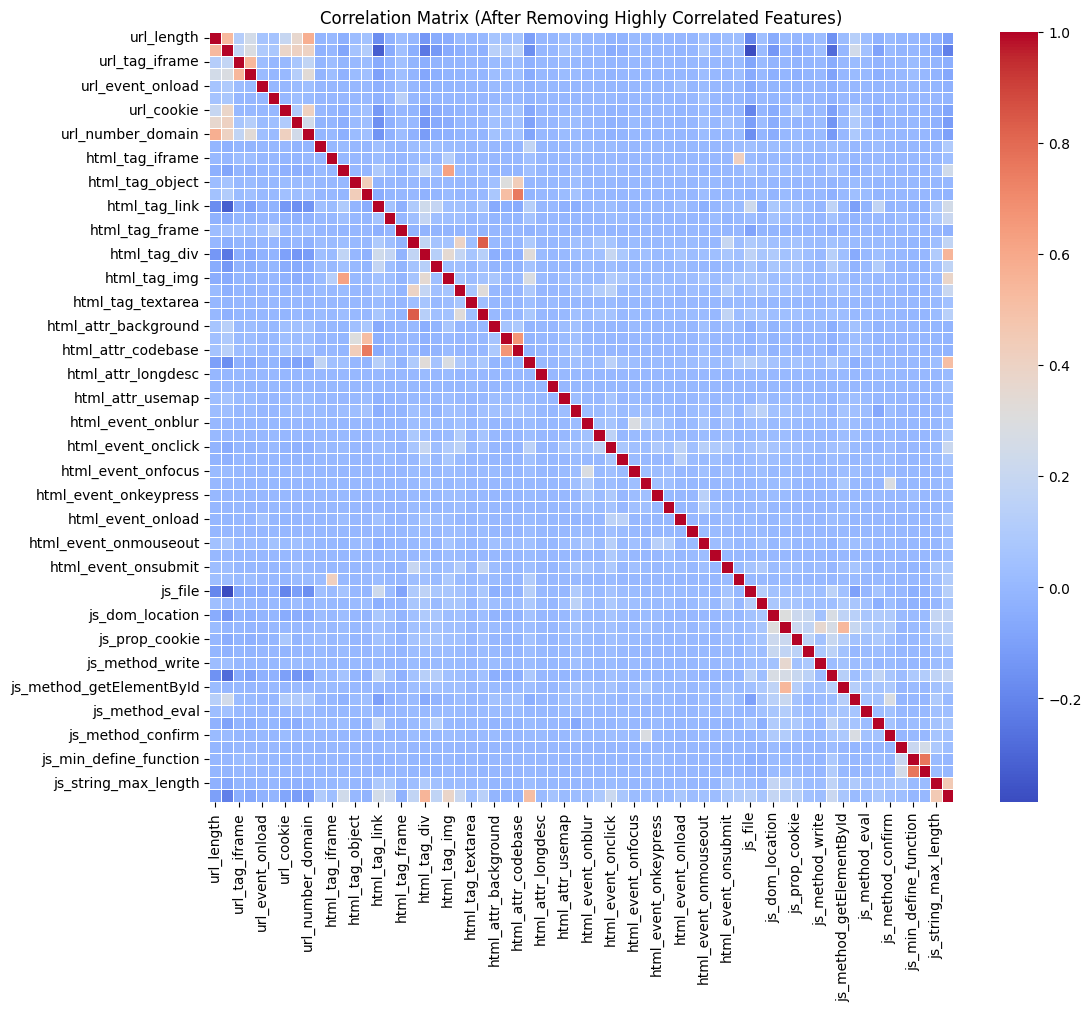

In [ ]:
# Recompute the correlation matrix
reduced_corr_matrix = reduced_dataset.corr()

# Plot correlation matrix after feature removal
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (After Removing Highly Correlated Features)")
plt.show()


 Split Dataset

Observation: Ensure a proper train-validation-test split.

Solution: Use 60%-20%-20% splits.


In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns=['Label'])
y = dataset['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


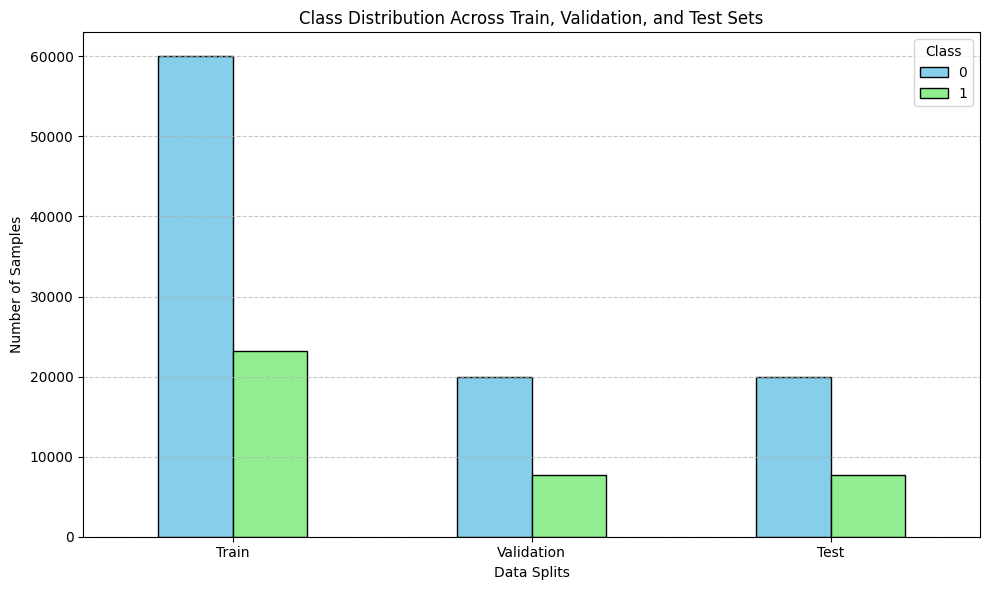

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count class distributions in each split
train_counts = y_train.value_counts()
val_counts = y_val.value_counts()
test_counts = y_test.value_counts()

# Combine counts into a DataFrame
split_data = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
}).T  # Transpose for easier plotting

# Plot the distributions
split_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'], edgecolor='black')

plt.title('Class Distribution Across Train, Validation, and Test Sets')
plt.xlabel('Data Splits')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Training the model:


Step 1: Define the Parameter Grid


Random Forest has several hyperparameters; the most impactful ones are:

**n_estimators**: Number of decision trees in the forest.

**max_depth**: Maximum depth of each tree.

**min_samples_split**: Minimum samples required to split a node.

**min_samples_leaf**: Minimum samples required to be a leaf node.


Step 2: Optimize hyperparameters like n_estimators, max_depth, and min_samples_split using GridSearchCV.

Perform Hyperparameter Tuning
Use GridSearchCV to find the best combination of parameters.

    Performs cross-validation on each parameter combination. Returns the best-performing parameters based on validation accuracy.

Step 3: Retrieve Best Parameters and Train Final Model

Step 4: Evaluate the model.

In [ ]:
# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Perform Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Step 3: Retrieve Best Parameters and Train Final Model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Step 4: Evaluate the Model
# Predict on test data
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.9s
[CV] END max_dep

K-fold Cross Validation:
Stratified: as it preserves the class proportions in each split and its likely for unbalanced datasets.

Fold 1:
Accuracy: 0.994
Precision: 0.997
Recall: 0.980
F1 Score: 0.988


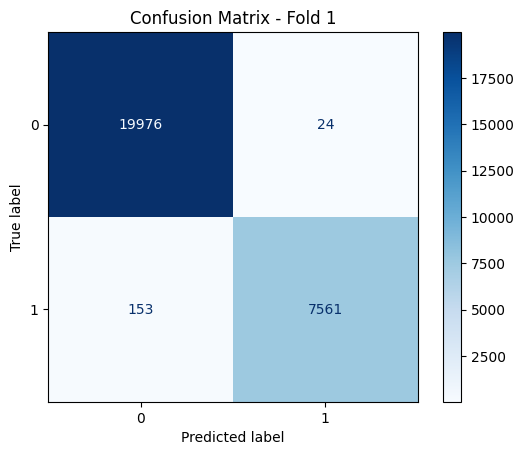

Fold 2:
Accuracy: 0.994
Precision: 0.997
Recall: 0.980
F1 Score: 0.988


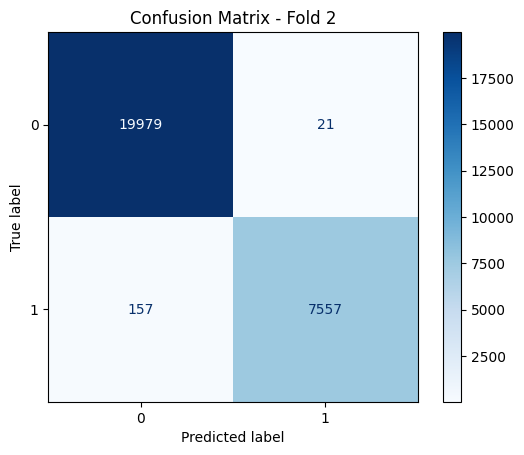

Fold 3:
Accuracy: 0.994
Precision: 0.996
Recall: 0.981
F1 Score: 0.989


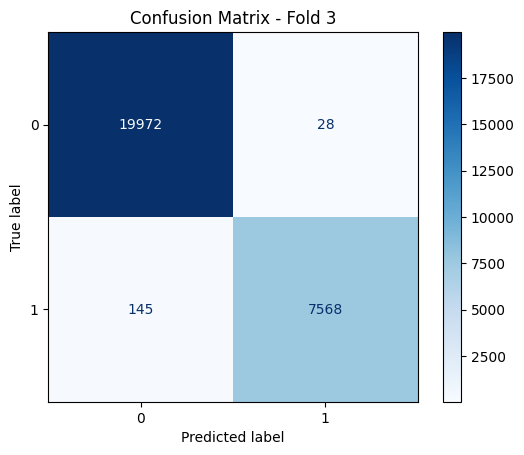

Fold 4:
Accuracy: 0.995
Precision: 0.997
Recall: 0.985
F1 Score: 0.991


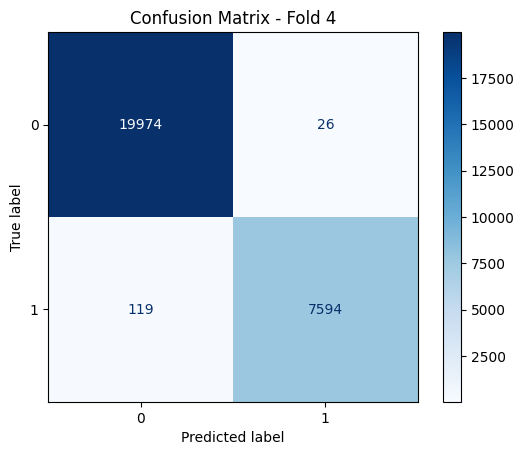

Fold 5:
Accuracy: 0.994
Precision: 0.997
Recall: 0.981
F1 Score: 0.989


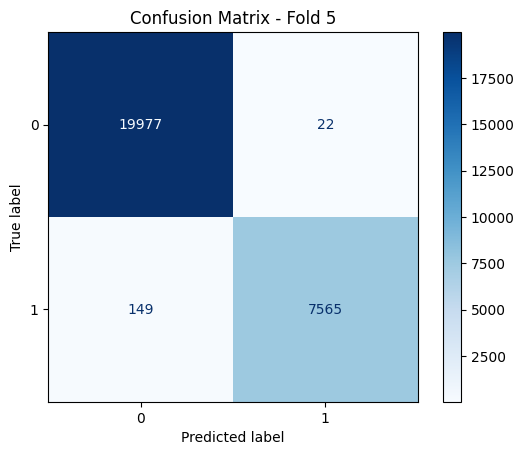


Overall Metrics:
Mean Accuracy: 0.994 ± 0.000
Mean Precision: 0.997 ± 0.000
Mean Recall: 0.981 ± 0.002
Mean F1 Score: 0.989 ± 0.001


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Define Stratified K-Fold Cross-Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform Cross-Validation
fold = 1
for train_index, val_index in skf.split(X, y):
    print(f"Fold {fold}:")

    # Split the data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    rf.fit(X_train, y_train)

    # Predict on validation data
    y_pred = rf.predict(X_val)

    # Compute metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Append metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print metrics
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    # Compute and display confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.show()

    fold += 1

# Print overall metrics
print("\nOverall Metrics:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Mean Precision: {np.mean(precision_scores):.3f} ± {np.std(precision_scores):.3f}")
print(f"Mean Recall: {np.mean(recall_scores):.3f} ± {np.std(recall_scores):.3f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")


Bar Plot for Overall Metrics


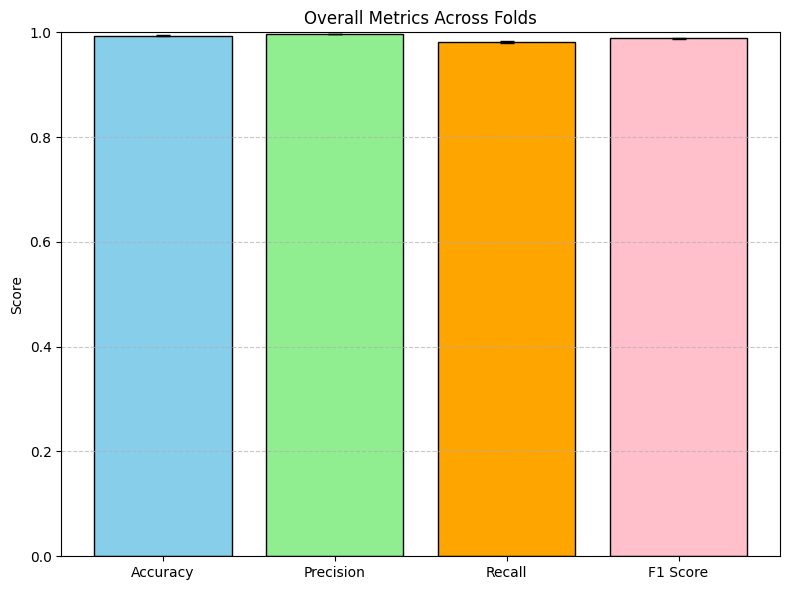

In [ ]:
# Bar plot for overall metrics
metrics_means = [np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]
metrics_std = [np.std(accuracy_scores), np.std(precision_scores), np.std(recall_scores), np.std(f1_scores)]

plt.figure(figsize=(8, 6))
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], metrics_means, yerr=metrics_std, color=['skyblue', 'lightgreen', 'orange', 'pink'], capsize=5, edgecolor='black')
plt.title("Overall Metrics Across Folds")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


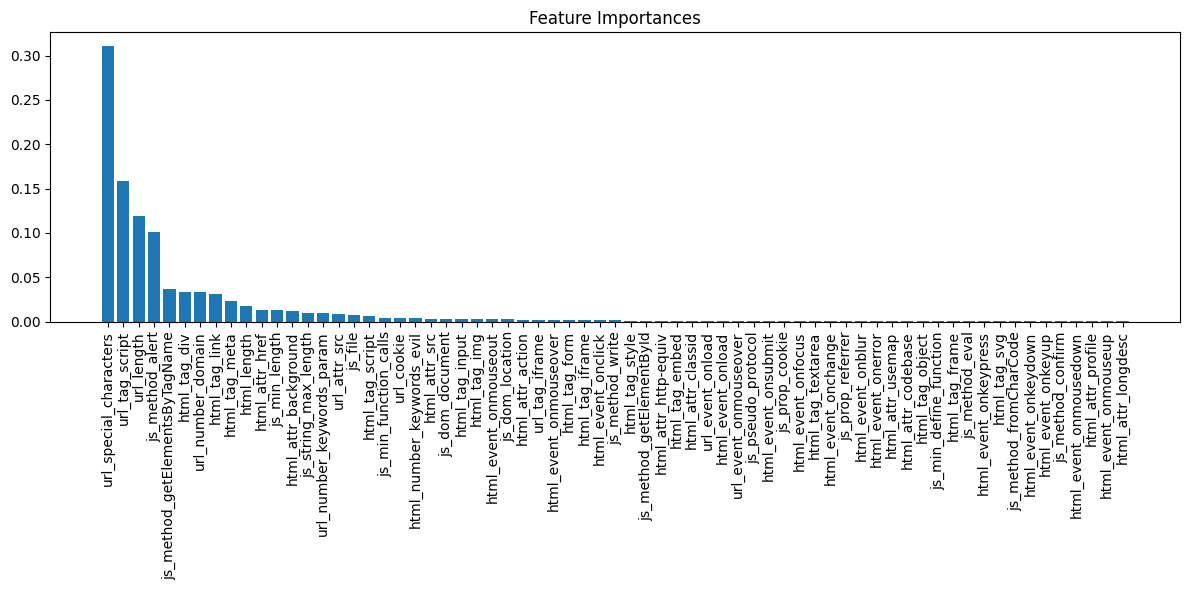

In [ ]:
# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


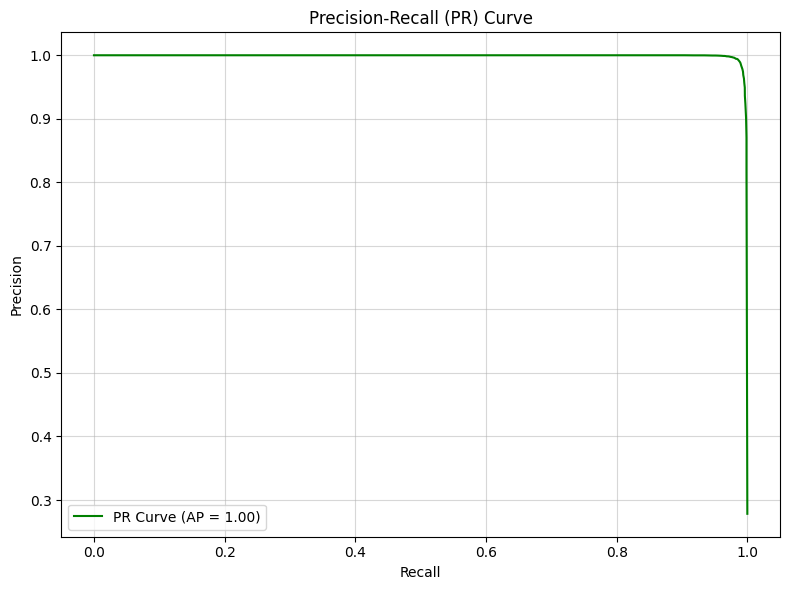

In [ ]:
# Precision-Recall Curve
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})', color='green')
plt.title("Precision-Recall (PR) Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# dataset 2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29421 entries, 0 to 29420
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contains &lt                29421 non-null  int64  
 1   ScripTag                    29421 non-null  int64  
 2   Readable                    29421 non-null  int64  
 3   Contains And                29421 non-null  int64  
 4   Contains Percentage         29421 non-null  int64  
 5   Contains Slash              29421 non-null  int64  
 6   Contains Plus               29421 non-null  int64  
 7   Contains Document           29421 non-null  int64  
 8   Contains SRC                29421 non-null  int64  
 9   Containss Var               29421 non-null  int64  
 10  Contains Cookie             29421 non-null  int64  
 11  Contains Single Quote       29421 non-null  int64  
 12  Contains Question Mark      29421 non-null  int64  
 13  Contains Exclamation Mark   294

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


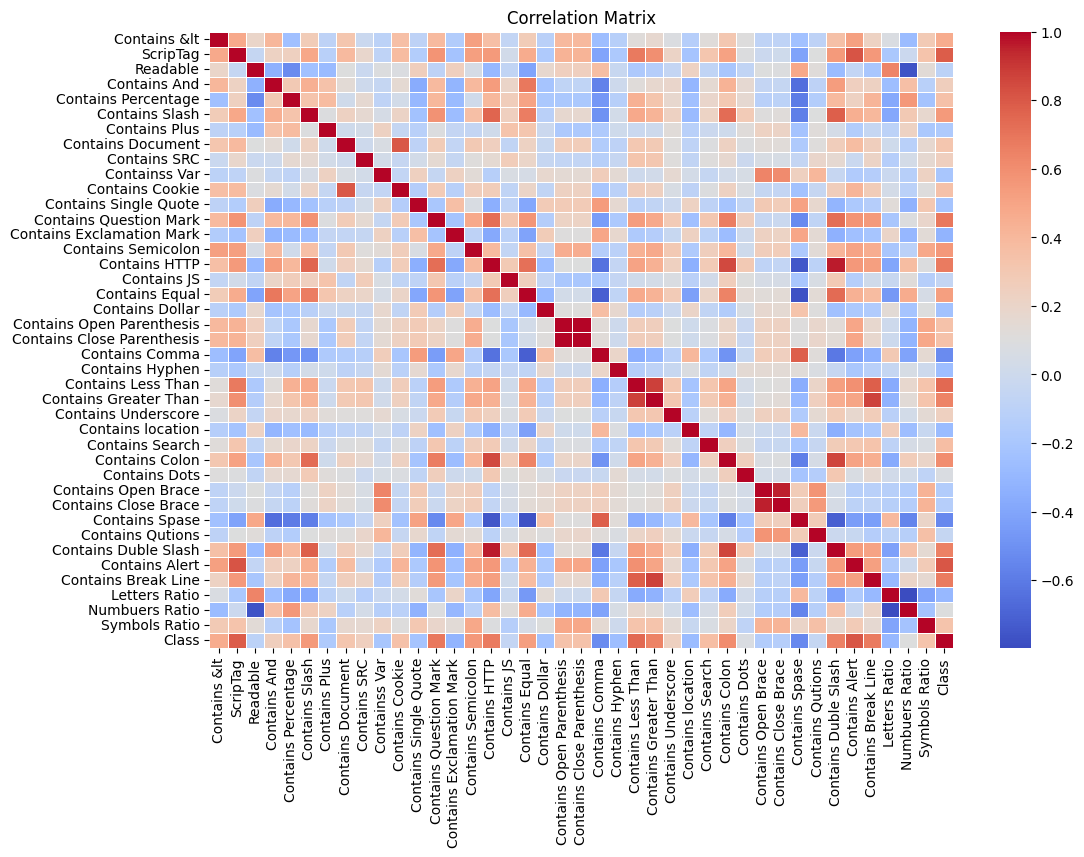

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.7s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.8s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=   2.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=10, n_estimators=200; total time=   2.1s
[CV] END .....................max_depth=10, n_est

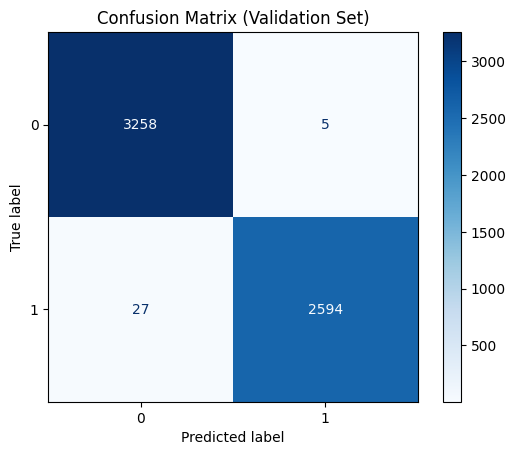

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3263
           1       1.00      0.99      1.00      2622

    accuracy                           1.00      5885
   macro avg       1.00      1.00      1.00      5885
weighted avg       1.00      1.00      1.00      5885



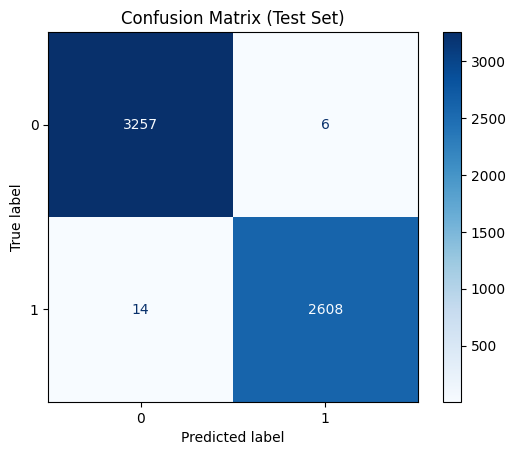

Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3263
           1       1.00      1.00      1.00      2622

    accuracy                           1.00      5885
   macro avg       1.00      1.00      1.00      5885
weighted avg       1.00      1.00      1.00      5885



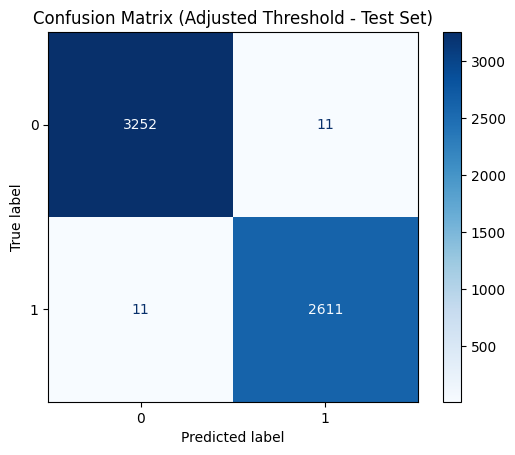

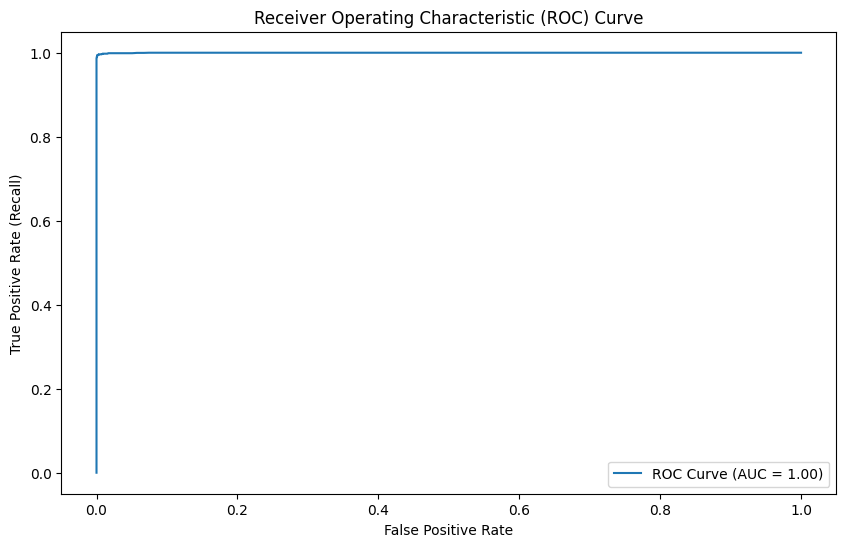

<ipython-input-28-f1f54fe801bd>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


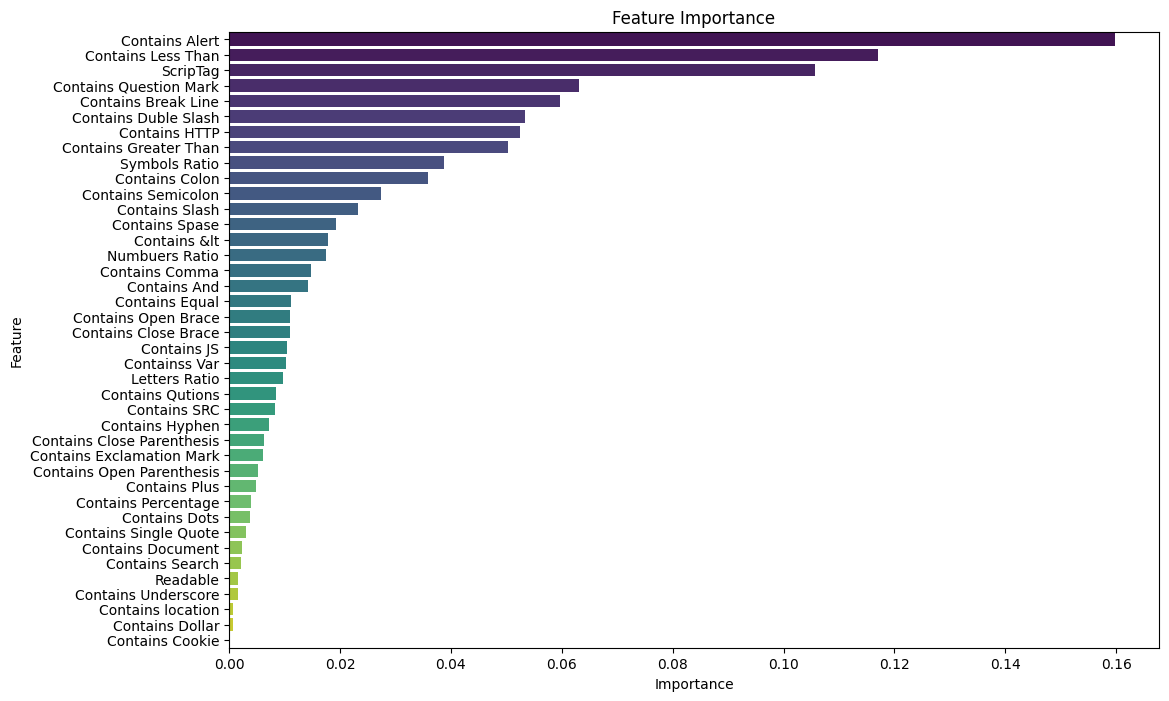

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/MyDrive/ml/jyo_xss_dataset.csv'
dataset = pd.read_csv(file_path)

# Display dataset info
print(dataset.info())

# Splitting dataset into features and target
X = dataset.drop(columns=["Class"])
y = dataset["Class"]

# Split into train, validation, and test sets (60-20-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Define Random Forest Classifier and GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    verbose=2
)

# Fit GridSearchCV on balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model and parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Validate on the validation set
y_val_pred = best_model.predict(X_val_scaled)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Visualize confusion matrix for validation set
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=best_model.classes_)
disp_val.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# Test the model on the test set
y_test_pred = best_model.predict(X_test_scaled)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Visualize confusion matrix for test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=best_model.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Adjust classification threshold
probabilities = best_model.predict_proba(X_test_scaled)[:, 1]
new_threshold = 0.4
y_test_pred_adjusted = (probabilities >= new_threshold).astype(int)

# Evaluate adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_test_pred_adjusted)
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_test_pred_adjusted))

# Visualize adjusted confusion matrix
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_adjusted, display_labels=best_model.classes_)
disp_adjusted.plot(cmap='Blues')
plt.title("Confusion Matrix (Adjusted Threshold - Test Set)")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# %%
# Load the dataset
file_path = '/content/drive/MyDrive/ml/jyo_xss_dataset.csv'
dataset2 = pd.read_csv(file_path)

# Describe the dataset
summary_row = dataset2.describe().T.reset_index()
summary_row.columns = ['Feature', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Instead of using ace_tools, display the DataFrame using pandas' display function
display(summary_row)
# or print the first few rows using head()
print(summary_row.head())

,Feature,Count,Mean,Std,Min,25%,50%,75%,Max
0,Contains &lt,29421.0,0.150709,0.357771,0.0,0.0000,0.0000,0.0000,1.0000
1,ScripTag,29421.0,0.385609,0.486747,0.0,0.0000,0.0000,1.0000,1.0000
2,Readable,29421.0,0.658237,0.474309,0.0,0.0000,1.0000,1.0000,1.0000
3,Contains And,29421.0,0.513885,0.499816,0.0,0.0000,1.0000,1.0000,1.0000
4,Contains Percentage,29421.0,0.412630,0.492316,0.0,0.0000,0.0000,1.0000,1.0000
5,Contains Slash,29421.0,0.703069,0.456914,0.0,0.0000,1.0000,1.0000,1.0000
6,Contains Plus,29421.0,0.208321,0.406114,0.0,0.0000,0.0000,0.0000,1.0000
7,Contains Document,29421.0,0.119982,0.324946,0.0,0.0000,0.0000,0.0000,1.0000
8,Contains SRC,29421.0,0.078855,0.269517,0.0,0.0000,0.0000,0.0000,1.0000
9,Containss Var,29421.0,0.067435,0.250778,0.0,0.0000,0.0000,0.0000,1.0000


               Feature    Count      Mean       Std  Min  25%  50%  75%  Max
0         Contains &lt  29421.0  0.150709  0.357771  0.0  0.0  0.0  0.0  1.0
1             ScripTag  29421.0  0.385609  0.486747  0.0  0.0  0.0  1.0  1.0
2             Readable  29421.0  0.658237  0.474309  0.0  0.0  1.0  1.0  1.0
3         Contains And  29421.0  0.513885  0.499816  0.0  0.0  1.0  1.0  1.0
4  Contains Percentage  29421.0  0.412630  0.492316  0.0  0.0  0.0  1.0  1.0


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29421 entries, 0 to 29420
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contains &lt                29421 non-null  int64  
 1   ScripTag                    29421 non-null  int64  
 2   Readable                    29421 non-null  int64  
 3   Contains And                29421 non-null  int64  
 4   Contains Percentage         29421 non-null  int64  
 5   Contains Slash              29421 non-null  int64  
 6   Contains Plus               29421 non-null  int64  
 7   Contains Document           29421 non-null  int64  
 8   Contains SRC                29421 non-null  int64  
 9   Containss Var               29421 non-null  int64  
 10  Contains Cookie             29421 non-null  int64  
 11  Contains Single Quote       29421 non-null  int64  
 12  Contains Question Mark      29421 non-null  int64  
 13  Contains Exclamation Mark   294

preprocessing

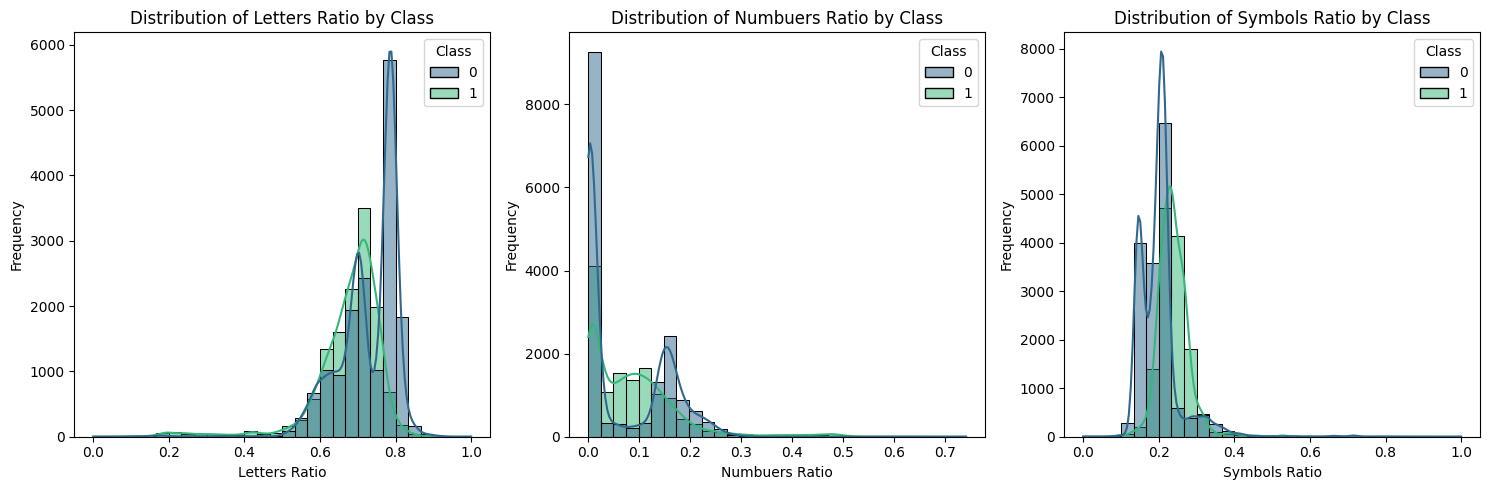

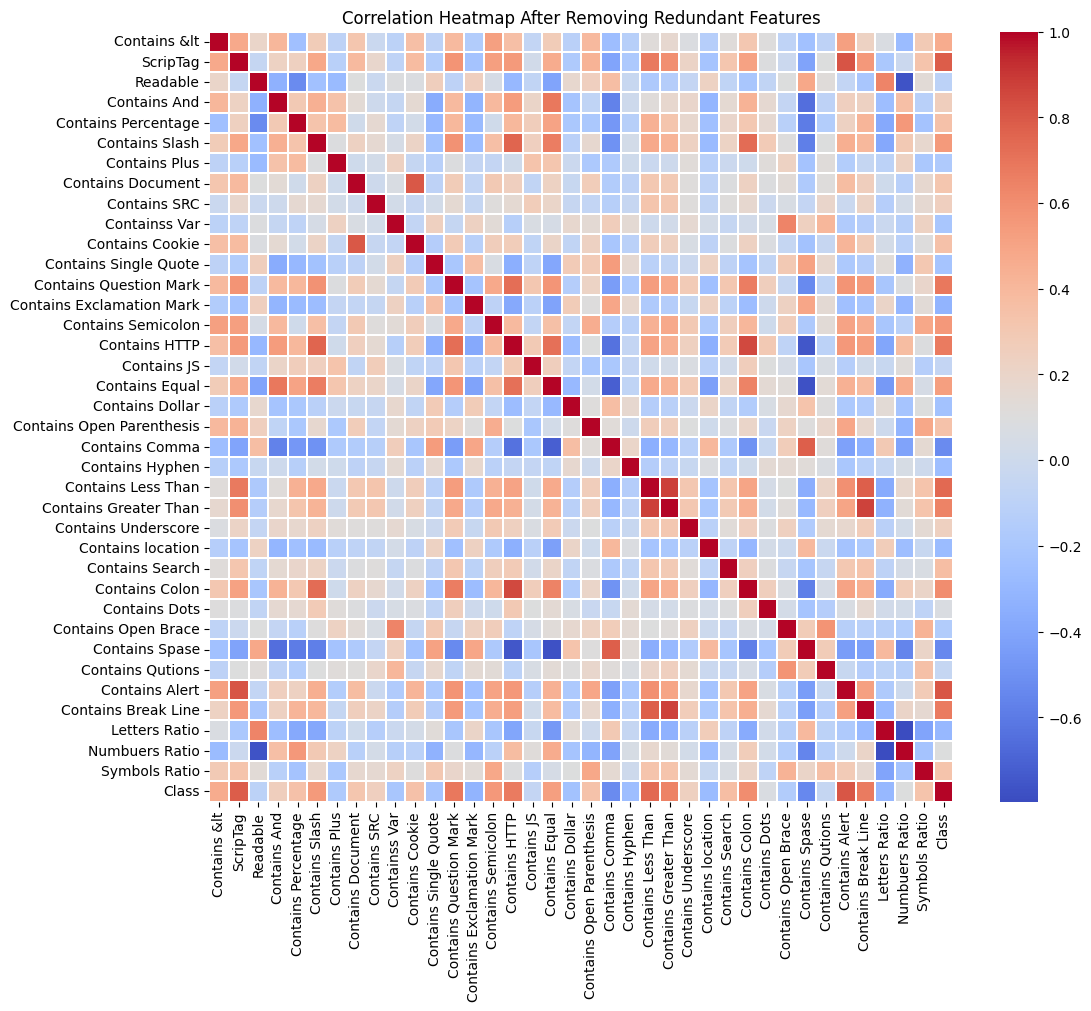

{'Outlier Summary':        Letters Ratio  Numbuers Ratio  Symbols Ratio
 count   29421.000000    29421.000000   29421.000000
 mean        0.704377        0.077165       0.218382
 std         0.090968        0.085273       0.056224
 min         0.000000        0.000000       0.000000
 25%         0.661300        0.004100       0.191000
 50%         0.710300        0.046200       0.212800
 75%         0.775300        0.140000       0.240700
 max         1.000000        0.741900       1.000000,
 'Train Class Distribution': Class
 0    55.449807
 1    44.550193
 Name: proportion, dtype: float64,
 'Validation Class Distribution': Class
 0    55.455472
 1    44.544528
 Name: proportion, dtype: float64,
 'Test Class Distribution': Class
 0    55.446049
 1    44.553951
 Name: proportion, dtype: float64}

In [ ]:
# Step 1: Remove Redundant Features
# Already identified redundant features in previous analysis
redundant_features = ["Contains Duble Slash", "Contains Close Parenthesis", "Contains Close Brace"]
dataset2_cleaned = dataset2.drop(columns=redundant_features)

# Step 2: Outlier Detection for Continuous Features
# Checking for outliers in continuous features
continuous_features = ["Letters Ratio", "Numbuers Ratio", "Symbols Ratio"]
outlier_summary = dataset2_cleaned[continuous_features].describe()

# Step 3: Dataset Splitting
X = dataset2_cleaned.drop(columns=["Class"])
y = dataset2_cleaned["Class"]

# Splitting the dataset into train, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 4: Class Distribution Analysis
train_class_distribution = y_train.value_counts(normalize=True) * 100
val_class_distribution = y_val.value_counts(normalize=True) * 100
test_class_distribution = y_test.value_counts(normalize=True) * 100

# Step 5: Analyze Distribution of Important Features Across Classes
important_features = ["Letters Ratio", "Numbuers Ratio", "Symbols Ratio"]
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions across classes
plt.figure(figsize=(15, 5))
for i, feature in enumerate(important_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=dataset2_cleaned, x=feature, hue="Class", kde=True, bins=30, palette="viridis")
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 6: Generate Correlation Heatmaps
correlation_matrix_cleaned = dataset2_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cleaned, cmap="coolwarm", annot=False, cbar=True, linewidths=0.1)
plt.title("Correlation Heatmap After Removing Redundant Features")
plt.show()

# Output class distributions and outlier summary
{
    "Outlier Summary": outlier_summary,
    "Train Class Distribution": train_class_distribution,
    "Validation Class Distribution": val_class_distribution,
    "Test Class Distribution": test_class_distribution,
}


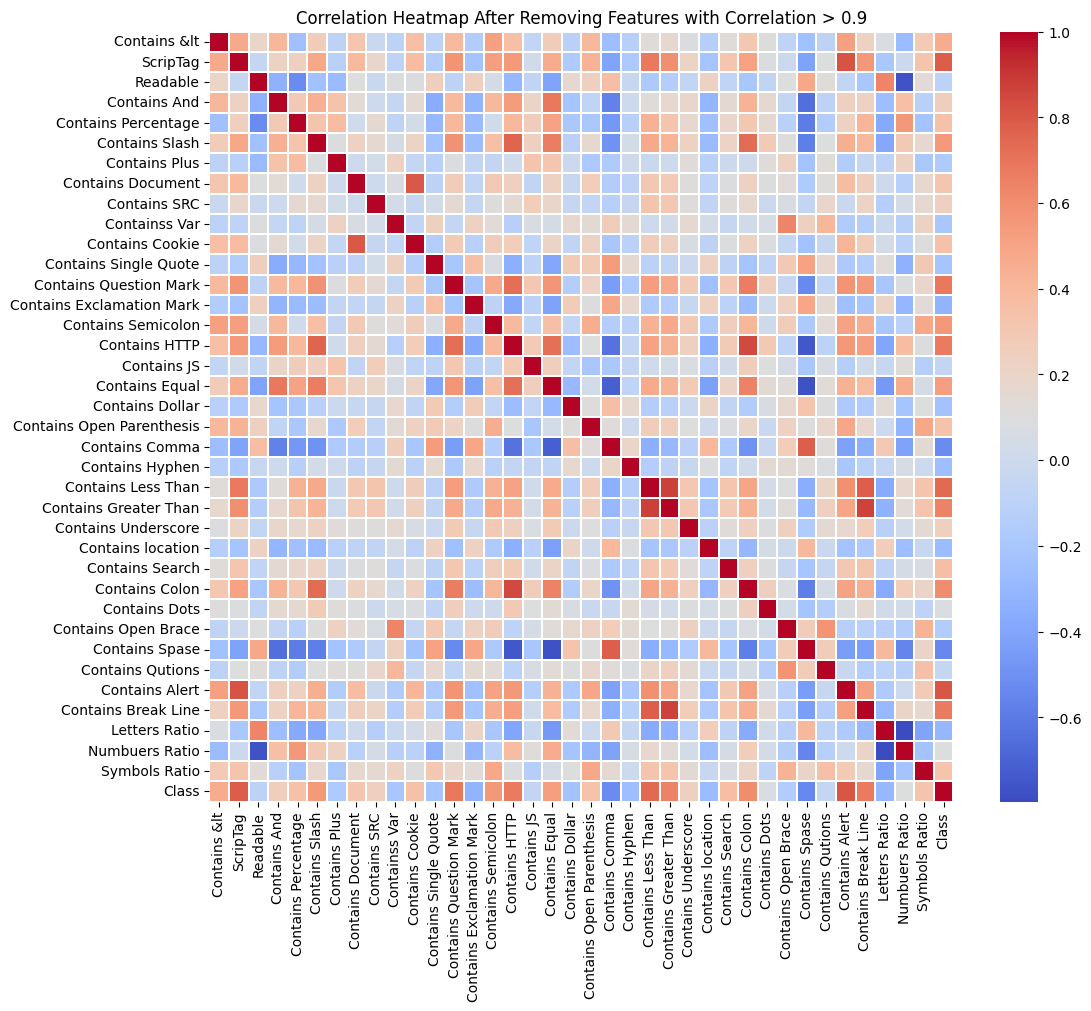

([], (29421, 38))

In [ ]:
import numpy as np

# Recalculate the correlation matrix for the cleaned dataset
correlation_matrix = dataset2_cleaned.corr()

# Upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
reduced_dataset = dataset2_cleaned.drop(columns=to_drop)

# Print removed features
removed_features = to_drop

# Print the shape of the reduced dataset
reduced_shape = reduced_dataset.shape

# Generate the correlation heatmap for the reduced dataset
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_dataset.corr(), cmap="coolwarm", annot=False, cbar=True, linewidths=0.1)
plt.title("Correlation Heatmap After Removing Features with Correlation > 0.9")
plt.show()

removed_features, reduced_shape


In [ ]:
print(dataset2.shape)

(29421, 41)


<ipython-input-34-0984e919874d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reduced_dataset, x=feature, palette="viridis")
<ipython-input-34-0984e919874d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reduced_dataset, x=feature, palette="viridis")
<ipython-input-34-0984e919874d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reduced_dataset, x=feature, palette="viridis")


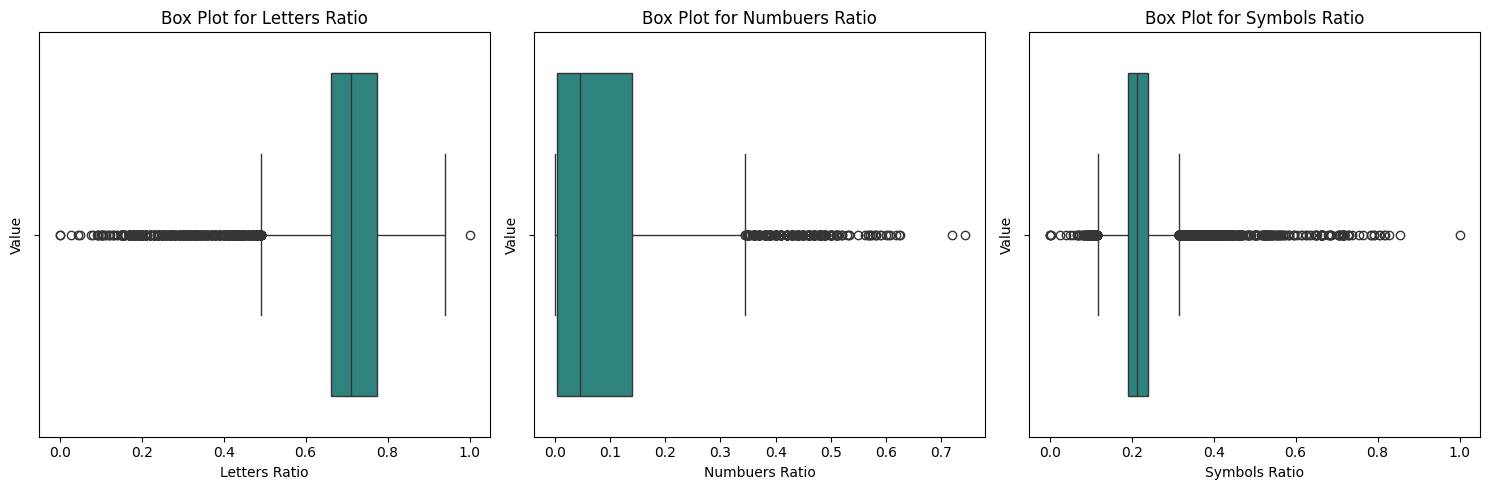

In [ ]:
# Visualize outliers using box plots for continuous features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=reduced_dataset, x=feature, palette="viridis")
    plt.title(f"Box Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Value")
plt.tight_layout()
plt.show()


In [ ]:
# Define a function to identify outliers using the IQR method
def remove_outliers_iqr(data, columns, threshold=1.5):
    """
    Remove outliers from the specified columns using the IQR method.
    :param data: DataFrame to process
    :param columns: List of columns to check for outliers
    :param threshold: Multiplier for the IQR to define outlier range
    :return: DataFrame with outliers removed
    """
    clean_data = data.copy()
    for column in columns:
        Q1 = clean_data[column].quantile(0.25)
        Q3 = clean_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        clean_data = clean_data[
            (clean_data[column] >= lower_bound) & (clean_data[column] <= upper_bound)
        ]
    return clean_data

# Continuous features to check for outliers
continuous_features = ["Letters Ratio", "Numbuers Ratio", "Symbols Ratio"]

# Remove outliers
dataset_no_outliers = remove_outliers_iqr(reduced_dataset, continuous_features)

# Print the shape before and after removing outliers
original_shape = reduced_dataset.shape
new_shape = dataset_no_outliers.shape

original_shape, new_shape
#after outlier removal

((29421, 38), (27684, 38))

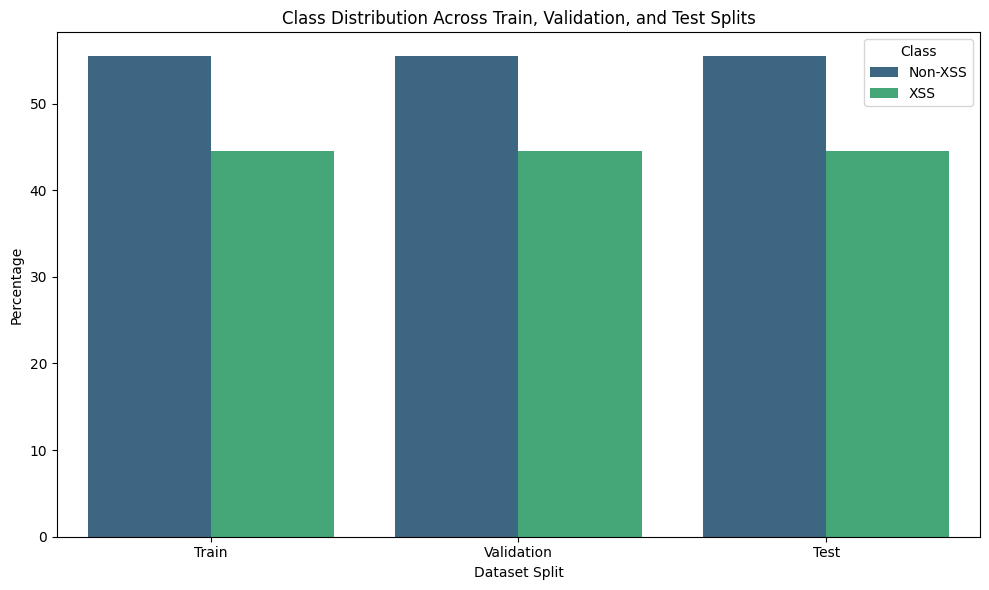

In [ ]:
# Prepare data for visualization
train_dist = y_train.value_counts(normalize=True) * 100
val_dist = y_val.value_counts(normalize=True) * 100
test_dist = y_test.value_counts(normalize=True) * 100

# Create a DataFrame for plotting
split_dist = pd.DataFrame({
    "Split": ["Train", "Train", "Validation", "Validation", "Test", "Test"],
    "Class": ["Non-XSS", "XSS", "Non-XSS", "XSS", "Non-XSS", "XSS"],
    "Percentage": [
        train_dist[0], train_dist[1],
        val_dist[0], val_dist[1],
        test_dist[0], test_dist[1]
    ]
})

# Plot the class distribution across splits
plt.figure(figsize=(10, 6))
sns.barplot(data=split_dist, x="Split", y="Percentage", hue="Class", palette="viridis")
plt.title("Class Distribution Across Train, Validation, and Test Splits")
plt.xlabel("Dataset Split")
plt.ylabel("Percentage")
plt.legend(title="Class", loc="upper right")
plt.tight_layout()
plt.show()


<ipython-input-38-f01f8a5d8955>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=split_size_df, x="Split", y="Count", palette="viridis")


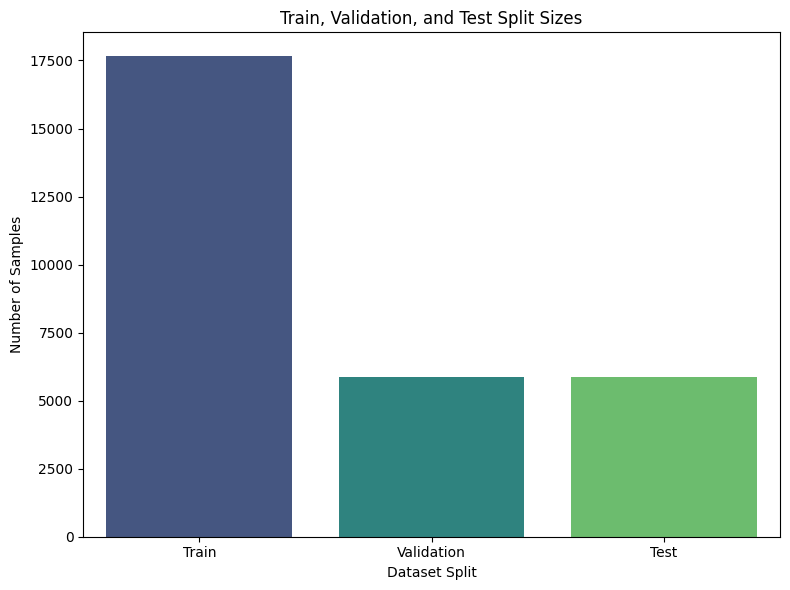

In [ ]:
# Calculate the size of each split
split_sizes = {
    "Train": len(y_train),
    "Validation": len(y_val),
    "Test": len(y_test)
}

# Create a DataFrame for plotting
split_size_df = pd.DataFrame({
    "Split": list(split_sizes.keys()),
    "Count": list(split_sizes.values())
})

# Plot the sizes of each dataset split
plt.figure(figsize=(8, 6))
sns.barplot(data=split_size_df, x="Split", y="Count", palette="viridis")
plt.title("Train, Validation, and Test Split Sizes")
plt.xlabel("Dataset Split")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


Training

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3263
           1       1.00      0.99      0.99      2621

    accuracy                           0.99      5884
   macro avg       1.00      0.99      0.99      5884
weighted avg       0.99      0.99      0.99      5884

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3263
           1       1.00      0.99      1.00      2622

    accuracy                           1.00      5885
   macro avg       1.00      1.00      1.00      5885
weighted avg       1.00      1.00      1.00      5885



<ipython-input-39-916996603c48>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette="viridis")


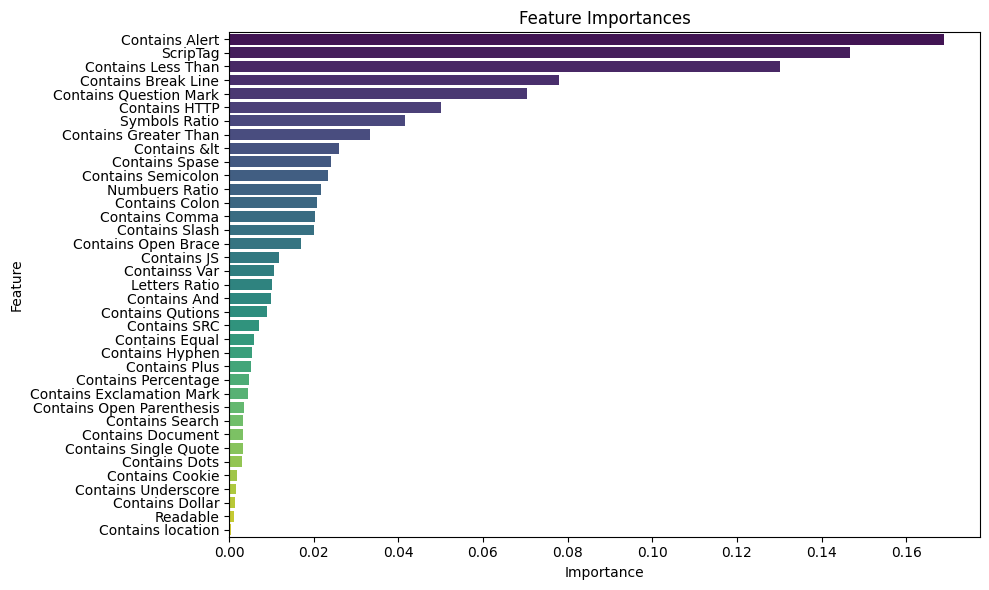

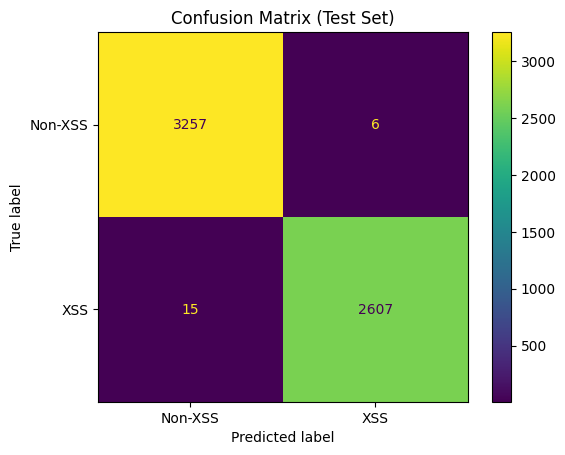

In [ ]:
# Step 1: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 2: Evaluate the Best Model on the Validation Set
best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)
y_val_prob = best_rf.predict_proba(X_val)[:, 1]

print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# Step 3: Evaluate on the Test Set
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Step 4: Feature Importance Visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# Step 5: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-XSS", "XSS"])
disp.plot(cmap="viridis")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Redefine and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_predictions = cross_val_predict(rf, X_train, y_train, cv=kfold)

# Calculate metrics for cross-validation
accuracy = accuracy_score(y_train, cv_predictions)
precision = precision_score(y_train, cv_predictions, average="weighted")
recall = recall_score(y_train, cv_predictions, average="weighted")
f1 = f1_score(y_train, cv_predictions, average="weighted")

# Generate the confusion matrix for cross-validation
cm_cv = confusion_matrix(y_train, cv_predictions)

# Visualize the confusion matrix
disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm_cv, display_labels=["Non-XSS", "XSS"])
disp_cv.plot(cmap="viridis")
plt.title("Confusion Matrix (5-Fold Cross-Validation)")
plt.show()

# Output overall metrics
print({
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})



In [ ]:
# Verify overall metrics using the confusion matrix
tn, fp, fn, tp = cm_cv.ravel()

# Calculate metrics from the confusion matrix
verified_accuracy = (tp + tn) / (tp + tn + fp + fn)
verified_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
verified_recall = tp / (tp + fn) if (tp + fn) > 0 else 0
verified_f1 = 2 * (verified_precision * verified_recall) / (verified_precision + verified_recall) if (verified_precision + verified_recall) > 0 else 0

# Output the verified metrics
print("Verified Metrics from Confusion Matrix:")
print(f"Accuracy: {verified_accuracy:.4f}")
print(f"Precision: {verified_precision:.4f}")
print(f"Recall: {verified_recall:.4f}")
print(f"F1-Score: {verified_f1:.4f}")

# Compare with the previously calculated metrics
print("\nPreviously Calculated Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Get probabilities for cross-validation predictions
cv_probabilities = cross_val_predict(rf, X_train, y_train, cv=kfold, method="predict_proba")[:, 1]

# Calculate precision-recall curve values
precision, recall, thresholds = precision_recall_curve(y_train, cv_probabilities)
pr_auc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})", color="blue")
plt.title("Precision-Recall Curve (5-Fold Cross-Validation)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC curve values
fpr, tpr, roc_thresholds = roc_curve(y_train, cv_probabilities)
roc_auc = roc_auc_score(y_train, cv_probabilities)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve (5-Fold Cross-Validation)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()


NameError: name 'roc_curve' is not defined

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preparing data for training
X = dataset2.drop(columns=['Class'])
y = dataset2['Class']

# Split into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Initialize logistic regression model
log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Validate the model on the validation set
val_predictions = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

# Evaluate on the training set
train_predictions = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on the test set
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for the positive class
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Metrics and reports
val_metrics = {
    "Validation Accuracy": val_accuracy,
    "Train Accuracy": train_accuracy,
    "Test Accuracy": accuracy_score(y_test, y_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Classification Report (Test)": classification_report(y_test, y_pred)
}

val_metrics


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Generate probabilities for the positive class
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})', color='green')
plt.title("Precision-Recall (PR) Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


# Dataset 3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   url_length                      101000 non-null  int64
 1   url_special_characters          101000 non-null  int64
 2   url_tag_script                  101000 non-null  int64
 3   url_tag_iframe                  101000 non-null  int64
 4   url_attr_src                    101000 non-null  int64
 5   url_event_onload                101000 non-null  int64
 6   url_event_onmouseover           101000 non-null  int64
 7   url_cookie                      101000 non-null  int64
 8   url_number_keywords_param       101000 non-null  int64
 9   url_number_domain               101000 non-null  int64
 10  html_tag_script                 101000 non-null  int64
 11  html_tag_iframe                 101000 non-null  int64
 12  html_tag_meta                   101000 non-n

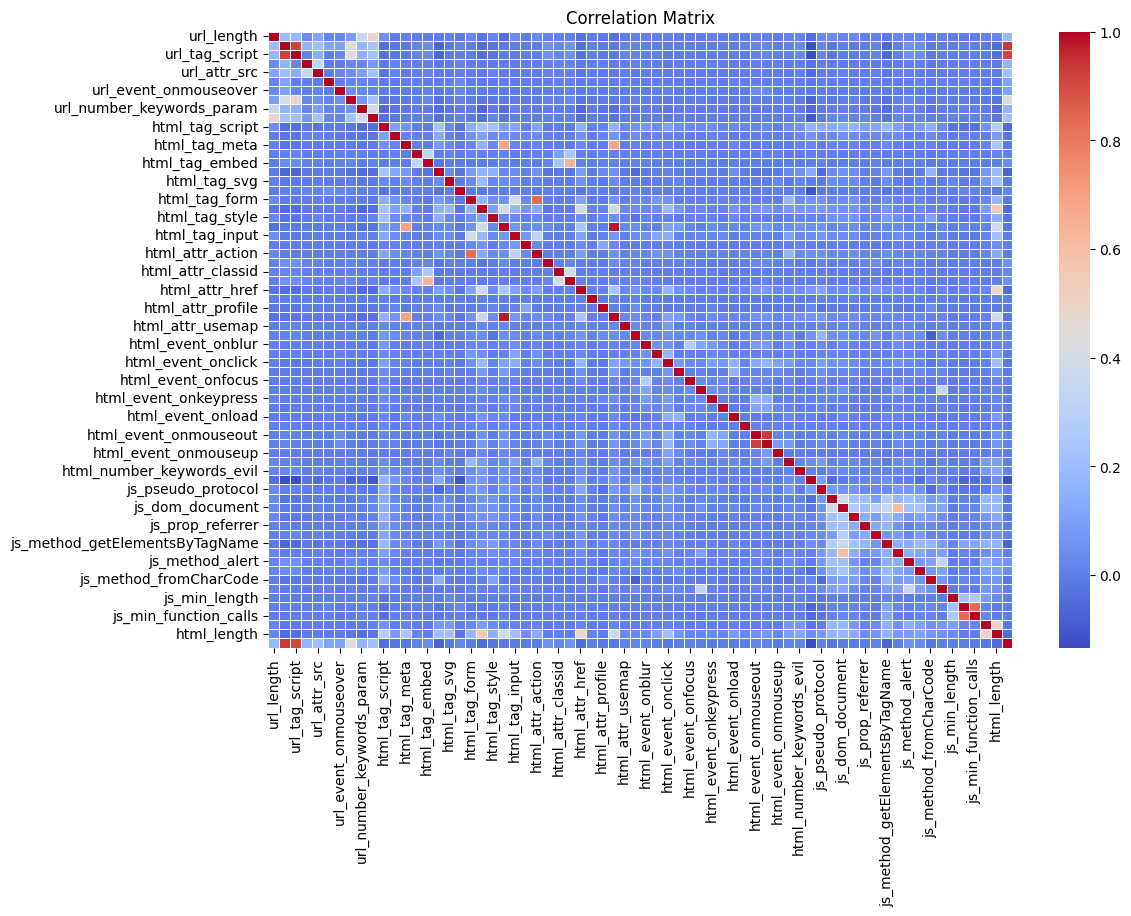

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.5s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.5s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.5s
[CV] END ......................max_depth=10, n_estimators=50; total time=   5.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=   9.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   5.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=   5.6s
[CV] END .....................max_depth=10, n_estimators=100; total time=   5.0s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.5s
[CV] END .....................max_depth=10, n_estimators=200; total time=  10.3s
[CV] END .....................max_depth=10, n_est

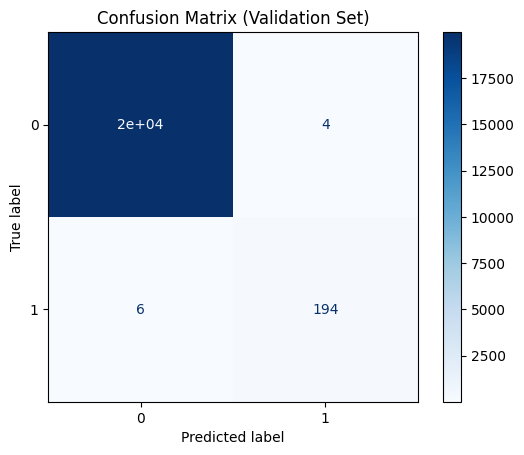

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.98      0.97      0.97       200

    accuracy                           1.00     20200
   macro avg       0.99      0.98      0.99     20200
weighted avg       1.00      1.00      1.00     20200



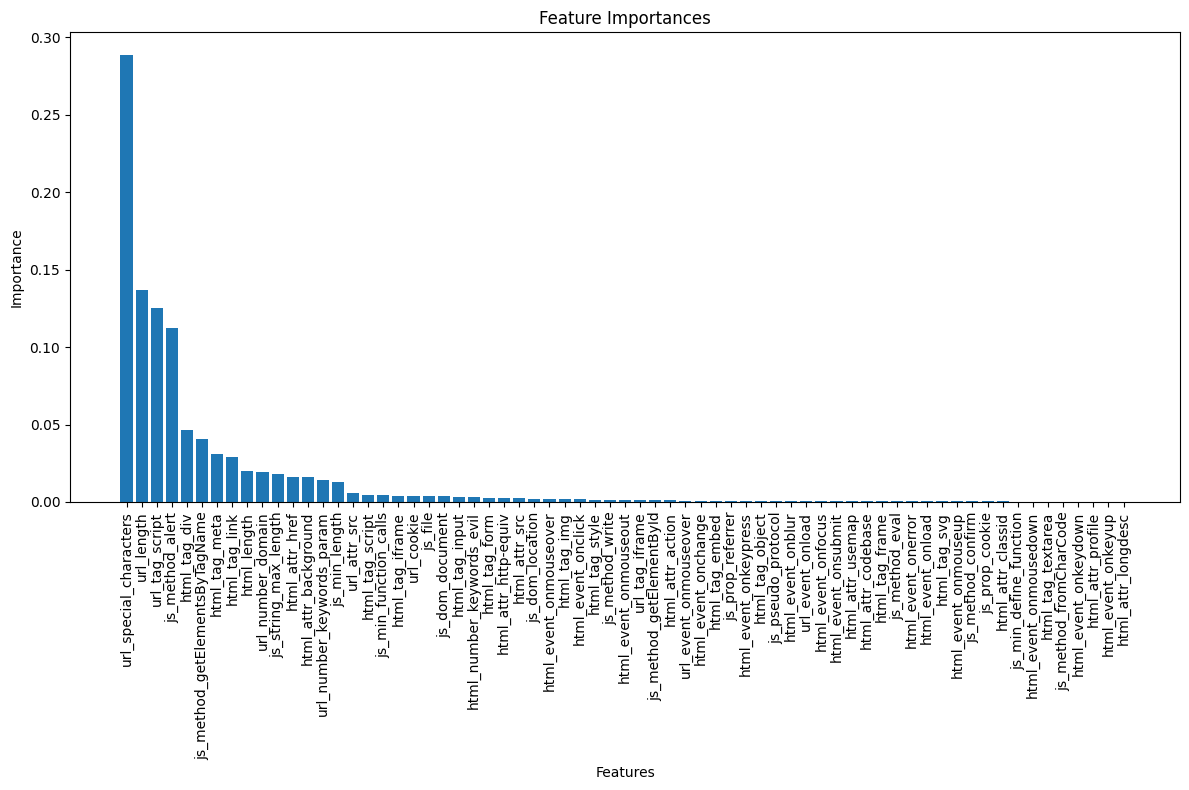

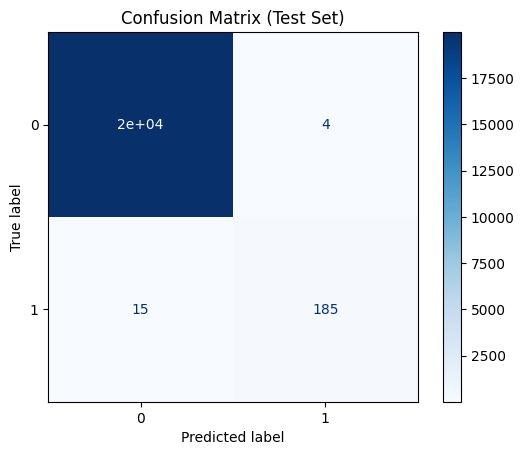

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.98      0.93      0.95       200

    accuracy                           1.00     20200
   macro avg       0.99      0.96      0.98     20200
weighted avg       1.00      1.00      1.00     20200



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load the dataset
file_path = '/content/drive/MyDrive/ml/XSS_dataset1.csv'
dataset = pd.read_csv(file_path)

# Display dataset info
dataset.info()

# Step 1: Splitting the dataset
X = dataset.drop(columns=["Class"])
y = dataset["Class"]

# Split into train (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 2: Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 3: Correlation matrix
correlation_matrix = dataset.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 5: Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val_scaled)

# Confusion Matrix for Validation Set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=best_model.classes_)
disp_val.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# Classification Report for Validation Set
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

# Step 6: Feature Importance Visualization
feature_importances = best_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(feature_importances)[::-1]
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), [features[i] for i in sorted_idx], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Step 7: Evaluate the model on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=best_model.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Classification Report for Test Set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))


In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = '/content/drive/MyDrive/ml/XSS_dataset1.csv'
dataset3 = pd.read_csv(file_path)

# Display basic information about the dataset
dataset3_info = {
    "Head": dataset3.head(),
    "Info": dataset3.info(),
    "Description": dataset3.describe(),
    "Missing Values": dataset3.isnull().sum()
}

dataset3_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   url_length                      101000 non-null  int64
 1   url_special_characters          101000 non-null  int64
 2   url_tag_script                  101000 non-null  int64
 3   url_tag_iframe                  101000 non-null  int64
 4   url_attr_src                    101000 non-null  int64
 5   url_event_onload                101000 non-null  int64
 6   url_event_onmouseover           101000 non-null  int64
 7   url_cookie                      101000 non-null  int64
 8   url_number_keywords_param       101000 non-null  int64
 9   url_number_domain               101000 non-null  int64
 10  html_tag_script                 101000 non-null  int64
 11  html_tag_iframe                 101000 non-null  int64
 12  html_tag_meta                   101000 non-n

{'Head':    url_length  url_special_characters  url_tag_script  url_tag_iframe  \
 0          98                       1               1               0   
 1          76                       1               0               1   
 2          81                       1               1               0   
 3          74                       1               1               0   
 4          80                       1               0               1   
 
    url_attr_src  url_event_onload  url_event_onmouseover  url_cookie  \
 0             0                 0                      0           0   
 1             1                 0                      0           0   
 2             0                 0                      0           0   
 3             1                 0                      0           0   
 4             1                 0                      0           0   
 
    url_number_keywords_param  url_number_domain  ...  js_method_alert  \
 0                          1   

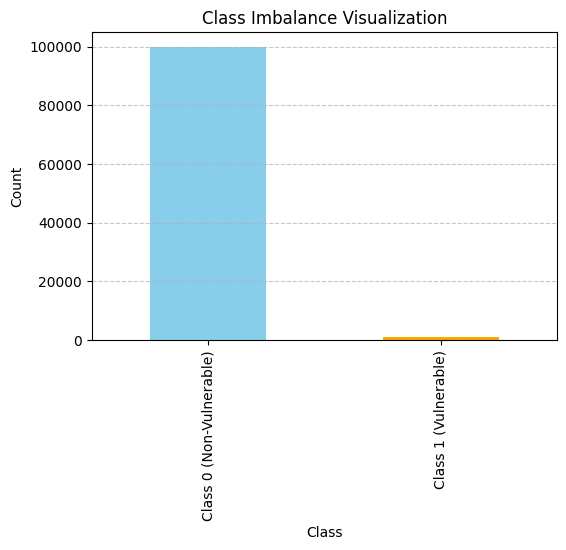

In [ ]:
# Create a boxplot for the target variable to visualize class imbalance
plt.figure(figsize=(6, 4))
dataset3['Class'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Imbalance Visualization')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0 (Non-Vulnerable)', 'Class 1 (Vulnerable)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

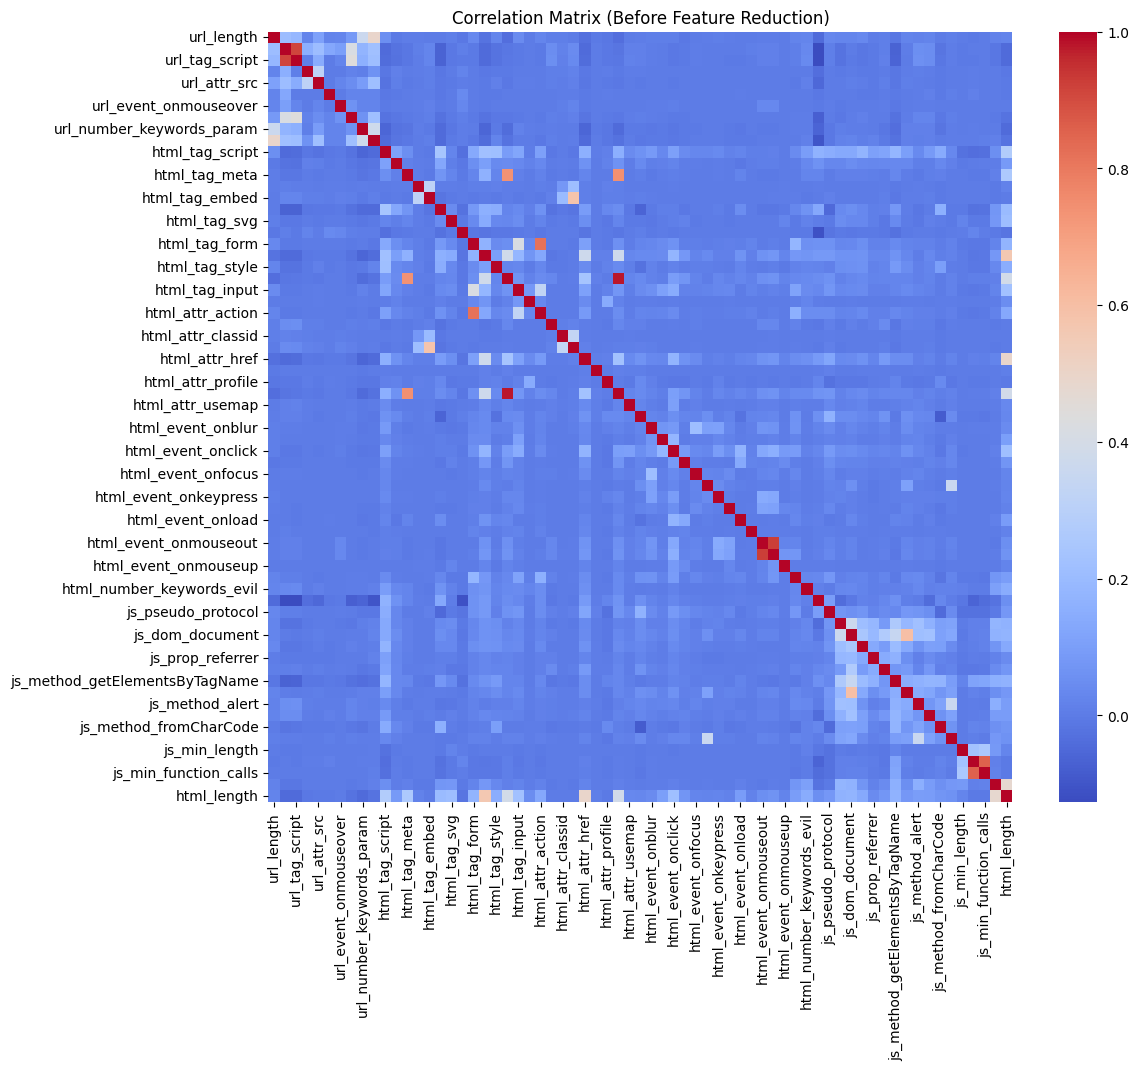

(101000, 68)


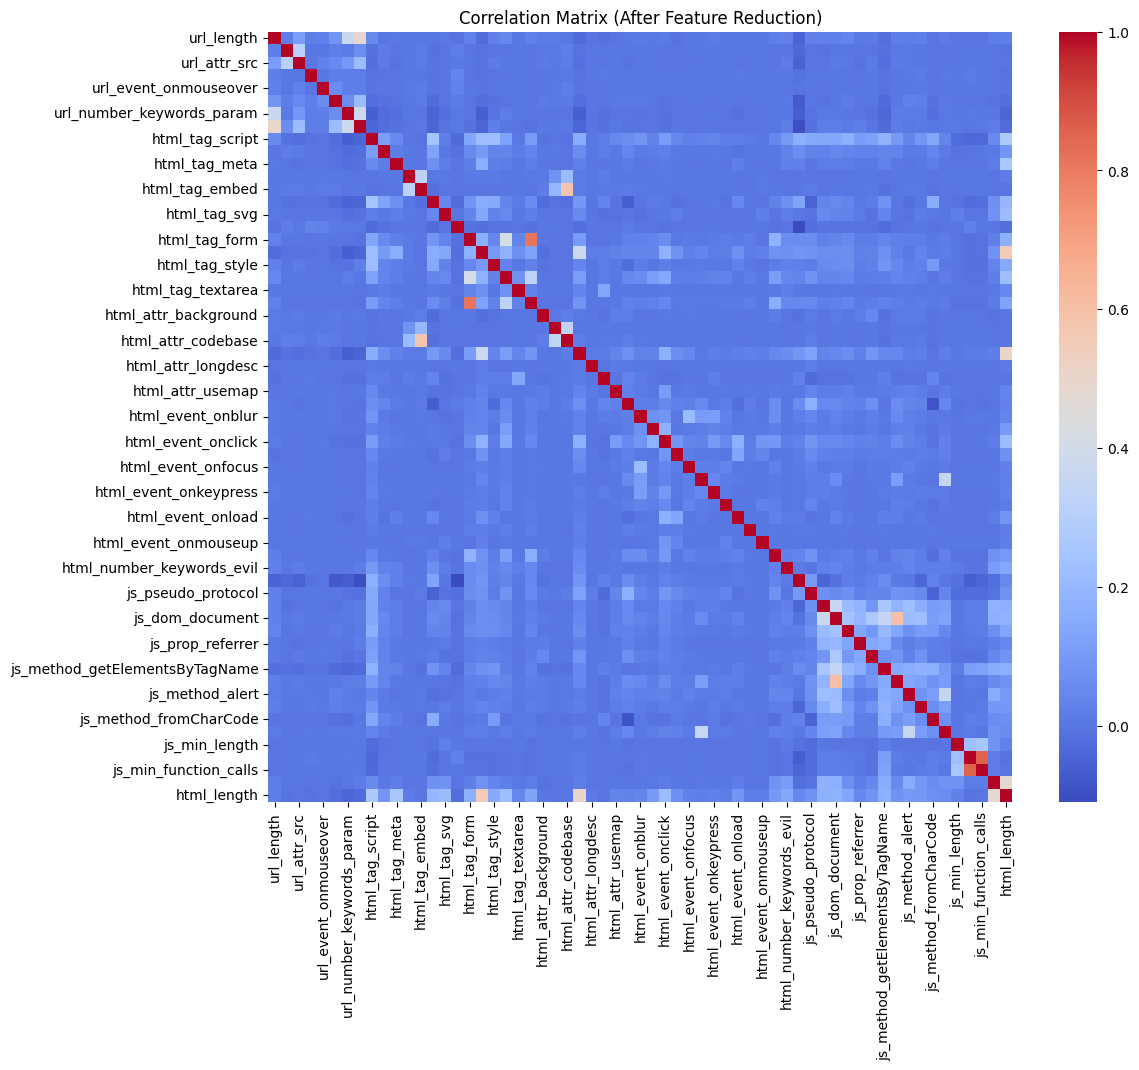

(101000, 68)
Confusion Matrix:
 [[19998     2]
 [   50   150]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.99      0.75      0.85       200

    accuracy                           1.00     20200
   macro avg       0.99      0.87      0.93     20200
weighted avg       1.00      1.00      1.00     20200



In [ ]:

# Step 1: Define Features and Target
X = dataset3.drop(columns=['Class'])
y = dataset3['Class']

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Feature Redundancy Reduction - Correlation Matrix (Before)
correlation_matrix_before = X_train.corr()

# Visualize Correlation Matrix (Before)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_before, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Before Feature Reduction)')
plt.show()
print(dataset3.shape)

# Drop highly correlated features (correlation > 0.9)
high_correlation_features = [
    column for column in correlation_matrix_before.columns
    if any(correlation_matrix_before[column].drop(column) > 0.9)
]
X_train_reduced = X_train.drop(columns=high_correlation_features)
X_test_reduced = X_test.drop(columns=high_correlation_features)

# Step 4: Feature Redundancy Reduction - Correlation Matrix (After)
correlation_matrix_after = X_train_reduced.corr()

# Visualize Correlation Matrix (After)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_after, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (After Feature Reduction)')
plt.show()
print(dataset3.shape)

# Step 5: Train Random Forest with Class Weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_reduced, y_train)

# Step 6: Evaluate Model Performance
y_pred = rf_model.predict(X_test_reduced)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


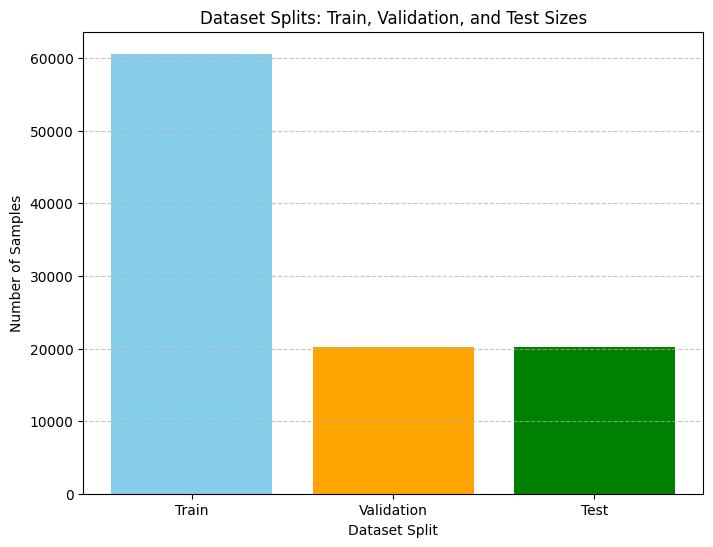

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset into train (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Step 2: Calculate the sizes of each split
split_sizes = {
    'Train': len(y_train),
    'Validation': len(y_val),
    'Test': len(y_test)
}

# Step 3: Visualize the split sizes using a bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(split_sizes.keys(), split_sizes.values(), color=['skyblue', 'orange', 'green'])
plt.title('Dataset Splits: Train, Validation, and Test Sizes')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset Split')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:
# Step 3: Train a Random Forest Classifier with balanced class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)

# Step 5: Print Evaluation Metrics
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred)

print("Validation Confusion Matrix:\n", val_confusion_matrix)
print("\nValidation Classification Report:\n", val_classification_report)

# Step 6: Evaluate the model on the test set
y_test_pred = rf_model.predict(X_test)

# Step 7: Print Evaluation Metrics
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Test Confusion Matrix:\n", test_confusion_matrix)
print("\nTest Classification Report:\n", test_classification_report)

Validation Confusion Matrix:
 [[19997     3]
 [   11   189]]

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.98      0.94      0.96       200

    accuracy                           1.00     20200
   macro avg       0.99      0.97      0.98     20200
weighted avg       1.00      1.00      1.00     20200

Test Confusion Matrix:
 [[19999     1]
 [   25   175]]

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.99      0.88      0.93       200

    accuracy                           1.00     20200
   macro avg       1.00      0.94      0.97     20200
weighted avg       1.00      1.00      1.00     20200



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   7.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   6.6s
[CV] END ......................max_depth=10, n_estimators=50; total time=   5.7s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.5s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.5s
[CV] END .....................max_depth=10, n_estimators=100; total time=   5.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   5.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.5s
[CV] END .....................max_depth=10, n_estimators=100; total time=   5.1s
[CV] END .....................max_depth=10, n_estimators=200; total time=  11.8s
[CV] END .....................max_depth=10, n_est

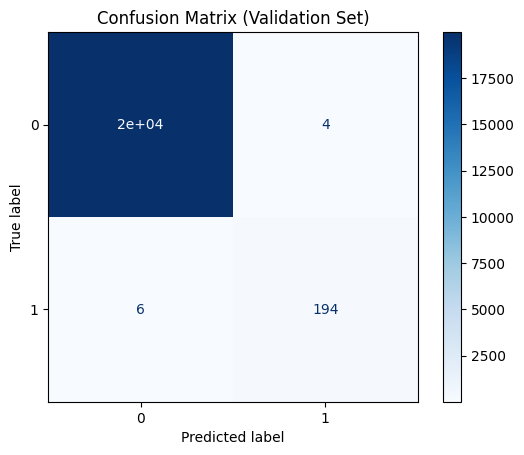

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.98      0.97      0.97       200

    accuracy                           1.00     20200
   macro avg       0.99      0.98      0.99     20200
weighted avg       1.00      1.00      1.00     20200



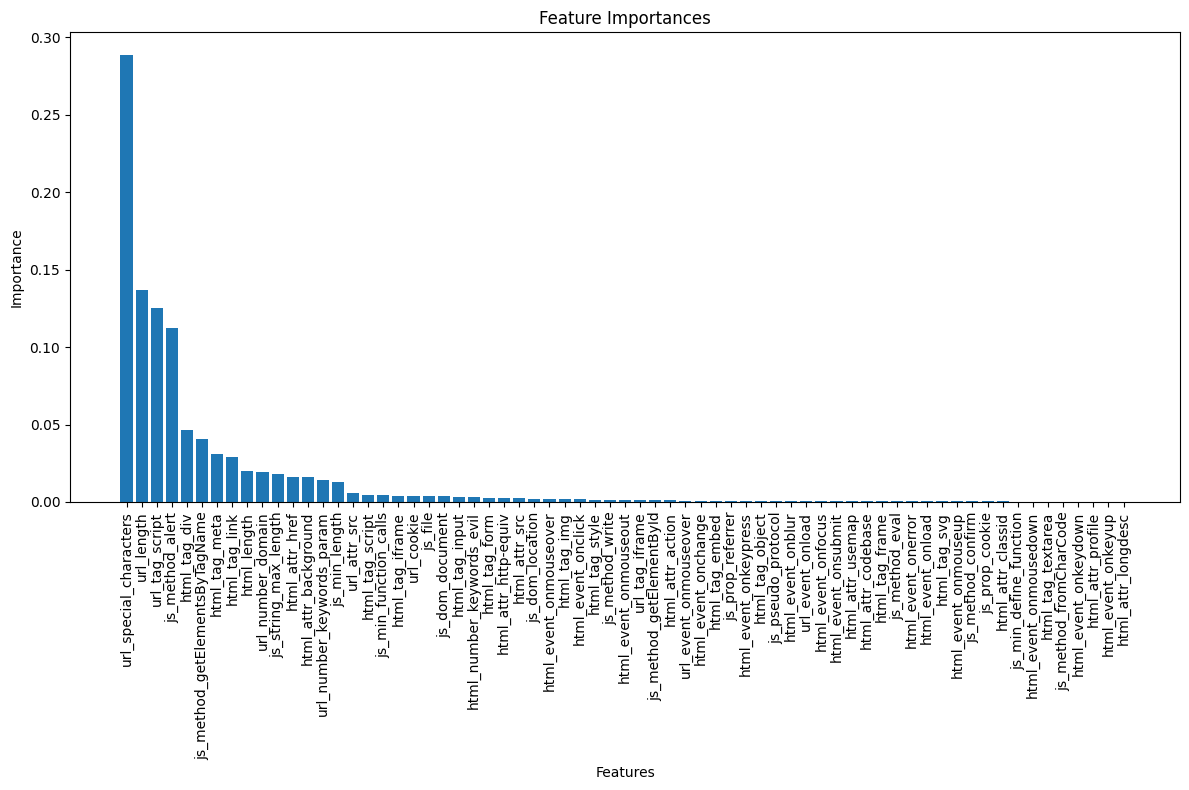

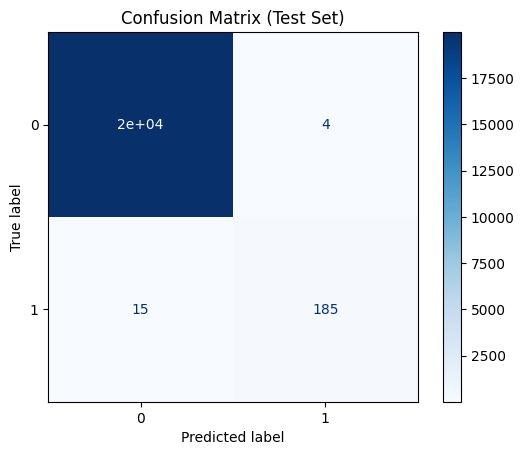

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.98      0.93      0.95       200

    accuracy                           1.00     20200
   macro avg       0.99      0.96      0.98     20200
weighted avg       1.00      1.00      1.00     20200



In [ ]:
# Step 1: Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 2: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 3: Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val_scaled)

# Confusion Matrix for Validation Set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=best_model.classes_)
disp_val.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# Classification Report for Validation Set
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

# Step 4: Feature Importance Visualization
feature_importances = best_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(feature_importances)[::-1]
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), [features[i] for i in sorted_idx], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Step 5: Evaluate the model on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=best_model.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Classification Report for Test Set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Average Accuracy: 0.9992
Average Precision: 0.9926
Average Recall: 0.9250
Average F1 Score: 0.9574
Validation Confusion Matrix (Last Fold):
[[20000     0]
 [   22   178]]


<Figure size 600x400 with 0 Axes>

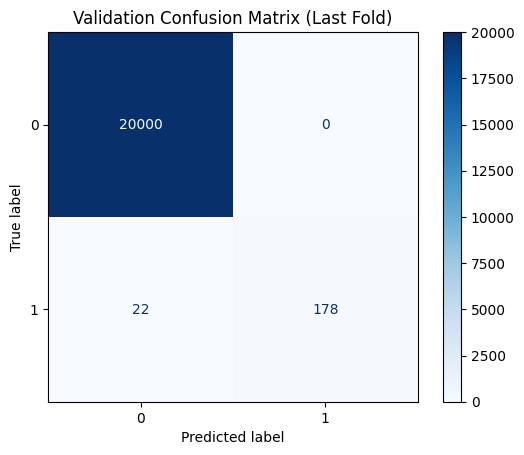

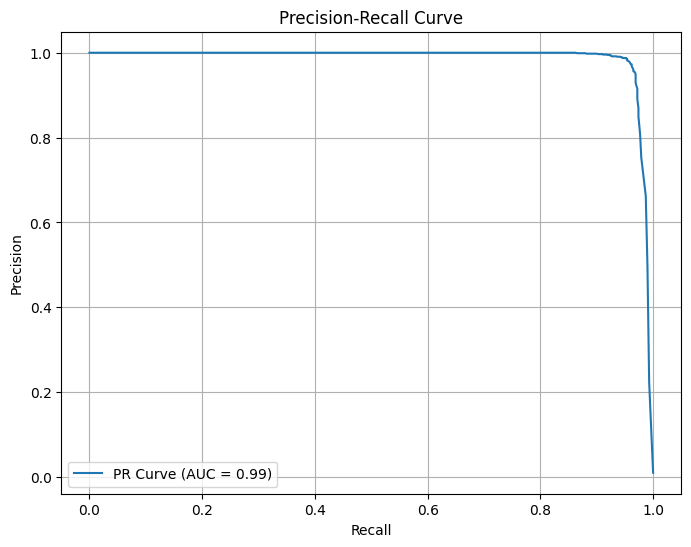

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics for evaluation
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []
all_y_true = []
all_y_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)

    # Train Random Forest
    rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
    rf_model.fit(X_train_scaled, y_train_fold)

    # Make predictions
    y_val_pred = rf_model.predict(X_val_scaled)
    y_val_prob = rf_model.predict_proba(X_val_scaled)[:, 1]

    # Compute metrics
    acc = accuracy_score(y_val_fold, y_val_pred)
    prec = precision_score(y_val_fold, y_val_pred)
    rec = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    cm = confusion_matrix(y_val_fold, y_val_pred)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    conf_matrices.append(cm)

    all_y_true.extend(y_val_fold)
    all_y_scores.extend(y_val_prob)

# Aggregate metrics
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")

# Display one of the validation confusion matrices
print("Validation Confusion Matrix (Last Fold):")
print(conf_matrices[-1])

# Visualize the confusion matrix for the last fold
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrices[-1], display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Validation Confusion Matrix (Last Fold)')
plt.show()

# Generate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(all_y_true, all_y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


Analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mock data for visualization (replace these with actual metrics/results from datasets)
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3']
precision = [0.88, 0.91, 0.85]
recall = [0.84, 0.89, 0.82]
f1_score = [0.86, 0.90, 0.83]
roc_auc = [0.92, 0.94, 0.90]
pr_auc = [0.89, 0.92, 0.87]

# Feature importance (mock data for visualization purposes)
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']
importance_dataset1 = [0.2, 0.15, 0.25, 0.1, 0.3]
importance_dataset2 = [0.25, 0.2, 0.1, 0.3, 0.15]
importance_dataset3 = [0.1, 0.3, 0.25, 0.15, 0.2]

# Metrics Comparison Visualization
plt.figure(figsize=(12, 6))
x = np.arange(len(datasets))
width = 0.2

plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1 Score')

plt.xticks(x, datasets)
plt.ylabel('Score')
plt.title('Model Performance Comparison Across Datasets')
plt.legend()
plt.show()

# ROC-AUC and PR-AUC Comparison
plt.figure(figsize=(12, 6))
plt.plot(datasets, roc_auc, marker='o', label='ROC AUC')
plt.plot(datasets, pr_auc, marker='o', label='PR AUC')

plt.ylabel('AUC Score')
plt.title('ROC and PR AUC Comparison Across Datasets')
plt.legend()
plt.show()

# Feature Importance Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
datasets_features = [importance_dataset1, importance_dataset2, importance_dataset3]
titles = ['Dataset 1', 'Dataset 2', 'Dataset 3']

for i, ax in enumerate(axes):
    ax.bar(features, datasets_features[i])
    ax.set_title(f'Feature Importance - {titles[i]}')
    ax.set_ylabel('Importance')
    ax.set_xlabel('Features')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

